In [1]:
from sklearn.metrics import classification_report
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_x_10, train_y_10), (test_x_10, test_y_10) = tf.keras.datasets.cifar10.load_data()
(train_x_100, train_y_100), (test_x_100, test_y_100) = tf.keras.datasets.cifar100.load_data()

train_x_10 = train_x_10.astype('float32')/255
test_x_10 = test_x_10.astype('float32')/255
train_x_100 = train_x_100.astype('float32')/255
test_x_100 = test_x_100.astype('float32')/255

In [3]:
input_layer = tf.keras.layers.Input(train_x_10.shape[1:])

main_x = tf.keras.layers.Conv2D(
    32,
    3,
    activation = 'relu',
    padding = 'same'
)(input_layer)

main_x = tf.keras.layers.Conv2D(
    32,
    3,
    activation = 'relu',
    padding = 'same'
)(main_x)

main_x = tf.keras.layers.Conv2D(
    64,
    3,
    activation = 'relu',
    padding = 'same'
)(main_x)

main_x = tf.keras.layers.Conv2D(
    64,
    3,
    activation = 'relu',
    padding = 'same'
)(main_x)

main_x = tf.keras.layers.MaxPool2D(2)(main_x)

main_x = tf.keras.layers.Conv2D(
    128,
    3,
    activation = 'relu',
    padding = 'same'
)(main_x)

main_x = tf.keras.layers.Conv2D(
    128,
    3,
    activation = 'relu',
    padding = 'same'
)(main_x)

main_x = tf.keras.layers.MaxPool2D(2)(main_x)
main_x = tf.keras.layers.Flatten()(main_x)

main_x = tf.keras.layers.Dense(128, activation = 'relu')(main_x)

ood_x = tf.keras.layers.Dense(128, activation = 'relu')(main_x)

main_x = tf.keras.layers.Dense(128, activation = 'relu')(main_x)

ood_x = tf.keras.layers.Concatenate()([ood_x, main_x])

main_output = tf.keras.layers.Dense(10, activation = 'softmax')(main_x)
ood_output = tf.keras.layers.Dense(32*32*3, activation = 'sigmoid')(ood_x)

model = tf.keras.models.Model(input_layer, [main_output, ood_output])
model.compile(
    loss = ['sparse_categorical_crossentropy', 'cosine_similarity'],
    optimizer = 'adam'
)
model.summary()

Metal device set to: Apple M1
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   18496       conv2d_1[0][0]                   
________________________________________________________________

2021-10-29 16:13:34.024215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-29 16:13:34.024844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
x_train_output = (train_x_10).reshape((train_x_10.shape[0], -1))
x_test_output = (test_x_10).reshape((test_x_10.shape[0], -1))
x_test_100_output = (test_x_100).reshape((test_x_100.shape[0], -1))

model.fit(
    train_x_10,
    [train_y_10, x_train_output],
    validation_split = 0.2,
    epochs = 100,
    batch_size = 256,
    callbacks = [tf.keras.callbacks.EarlyStopping(min_delta = 0.03, patience = 3, restore_best_weights = True)]
)

2021-10-29 16:13:35.315011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-29 16:13:35.317816: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2021-10-29 16:13:35.539799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 0.7693 - dense_3_loss: 1.6872 - dense_4_loss: -0.9179

2021-10-29 16:14:01.220045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 28s 169ms/step - loss: 0.7693 - dense_3_loss: 1.6872 - dense_4_loss: -0.9179 - val_loss: 0.4782 - val_dense_3_loss: 1.4059 - val_dense_4_loss: -0.9278
Epoch 2/100
157/157 [==============================] - 26s 166ms/step - loss: 0.3025 - dense_3_loss: 1.2329 - dense_4_loss: -0.9305 - val_loss: 0.1944 - val_dense_3_loss: 1.1291 - val_dense_4_loss: -0.9347
Epoch 3/100
157/157 [==============================] - 27s 175ms/step - loss: 0.0574 - dense_3_loss: 0.9935 - dense_4_loss: -0.9362 - val_loss: 0.0402 - val_dense_3_loss: 0.9799 - val_dense_4_loss: -0.9397
Epoch 4/100
157/157 [==============================] - 26s 167ms/step - loss: -0.1197 - dense_3_loss: 0.8203 - dense_4_loss: -0.9399 - val_loss: -0.0558 - val_dense_3_loss: 0.8884 - val_dense_4_loss: -0.9442
Epoch 5/100
157/157 [==============================] - 26s 167ms/step - loss: -0.2545 - dense_3_loss: 0.6882 - dense_4_loss: -0.9427 - val_loss: -0.1456 - val_dense_3_loss: 0.7989 - val_

In [5]:
cifar_10_class_mapping = dict(zip(
    range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
))

cifar_100_class_mapping = {
    0: 'apple',
    1: 'aquarium_fish',
    2: 'baby',
    3: 'bear',
    4: 'beaver',
    5: 'bed',
    6: 'bee',
    7: 'beetle',
    8: 'bicycle',
    9: 'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'crab',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm'
}

In [6]:
preds, autoencode = model.predict(train_x_10)
preds = preds.argmax(axis = 1)
preds = [cifar_10_class_mapping[pred] for pred in preds]
similarities = tf.keras.losses.cosine_similarity(x_train_output.astype('float32'), autoencode.astype('float32')).numpy()
print(similarities.mean())
print(similarities.std())

threshold = similarities.mean() + 1.5*similarities.std()
print(threshold)

2021-10-29 16:17:09.237870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


-0.9442332
0.033620484
-0.8938024528324604


In [7]:
test_preds, test_autoencode = model.predict(test_x_10)
test_preds = test_preds.argmax(axis = 1)
test_preds = [cifar_10_class_mapping[pred] for pred in test_preds]
test_similarities = tf.keras.losses.cosine_similarity(x_test_output.astype('float32'), test_autoencode.astype('float32')).numpy()
test_trust = test_similarities <= threshold
print(test_similarities.mean())
print(test_similarities.std())

-0.9446417
0.033372983


In [8]:
pd.Series(test_trust).value_counts()

True     9279
False     721
dtype: int64

In [9]:
in_domain_trust = pd.DataFrame()
in_domain_trust['actual_class'] = [cifar_10_class_mapping[val] for val in test_y_10.flatten()]
in_domain_trust['predicted_class'] = test_preds
in_domain_trust['trust'] = test_trust

in_domain_trust.head()

actual_class predicted_class  trust
0          cat             cat   True
1         ship            ship   True
2         ship            ship   True
3     airplane        airplane   True
4         frog            frog   True

In [10]:
in_domain_trust.groupby(by = ['actual_class', 'trust']).size().unstack()

trust         False  True
actual_class             
airplane         26   974
automobile      151   849
bird             76   924
cat             101   899
deer             44   956
dog              84   916
frog             77   923
horse            54   946
ship             31   969
truck            77   923

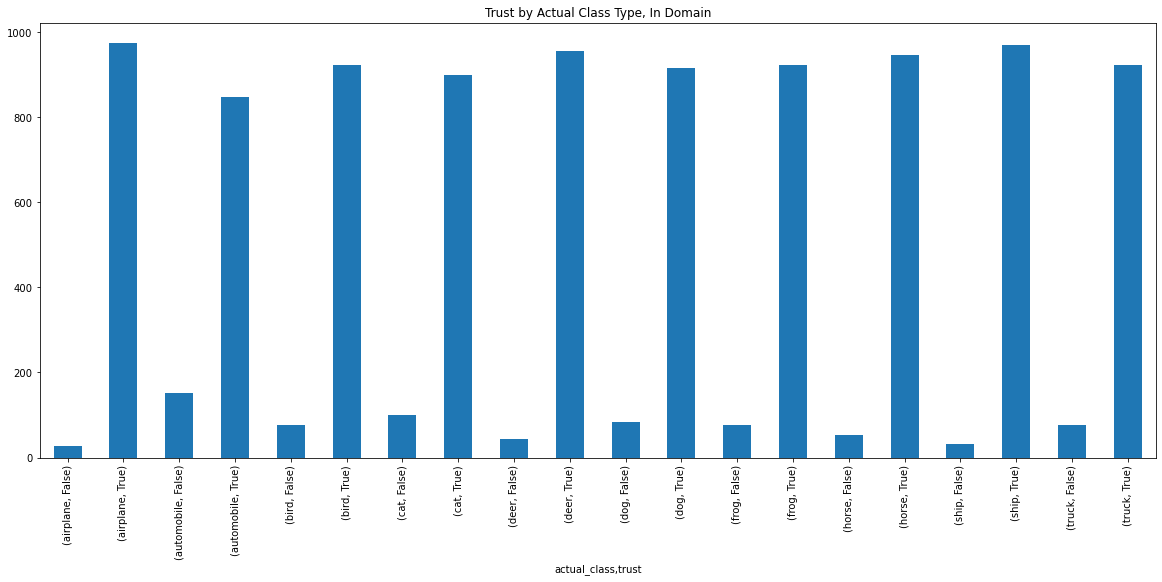

In [11]:
in_domain_trust.groupby(by = ['actual_class', 'trust']).size().plot(kind = 'bar', stacked = True, figsize = (20, 8), title = 'Trust by Actual Class Type, In Domain')
plt.show()

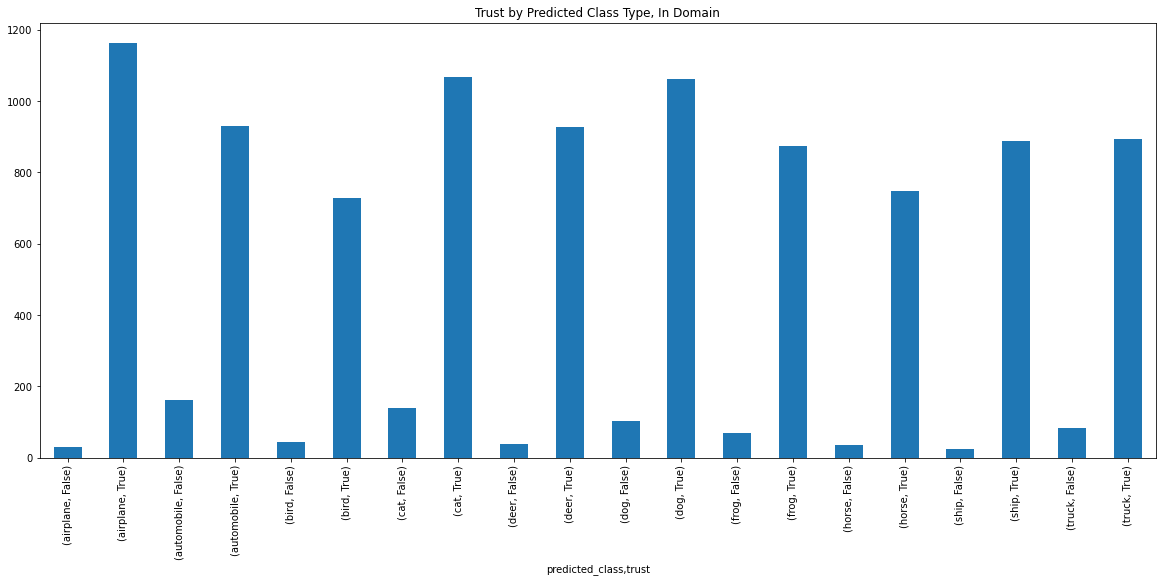

In [12]:
in_domain_trust.groupby(by = ['predicted_class', 'trust']).size().plot(kind = 'bar', stacked = True, figsize = (20, 8), title = 'Trust by Predicted Class Type, In Domain')
plt.show()

In [13]:
print('Global Classification Report, in Domain')
print(classification_report(in_domain_trust['actual_class'], in_domain_trust['predicted_class']))

Global Classification Report, in Domain
              precision    recall  f1-score   support

    airplane       0.69      0.82      0.75      1000
  automobile       0.81      0.89      0.85      1000
        bird       0.67      0.52      0.59      1000
         cat       0.49      0.58      0.53      1000
        deer       0.68      0.65      0.67      1000
         dog       0.56      0.65      0.60      1000
        frog       0.81      0.76      0.78      1000
       horse       0.86      0.68      0.76      1000
        ship       0.86      0.78      0.82      1000
       truck       0.81      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [14]:
print('Trusted Classification Report, in Domain')
print(classification_report(in_domain_trust[in_domain_trust.trust == True]['actual_class'], in_domain_trust[in_domain_trust.trust == True]['predicted_class']))

Trusted Classification Report, in Domain
              precision    recall  f1-score   support

    airplane       0.69      0.83      0.75       974
  automobile       0.81      0.89      0.85       849
        bird       0.68      0.53      0.60       924
         cat       0.49      0.58      0.53       899
        deer       0.67      0.65      0.66       956
         dog       0.57      0.66      0.61       916
        frog       0.81      0.76      0.79       923
       horse       0.86      0.68      0.76       946
        ship       0.86      0.79      0.83       969
       truck       0.82      0.80      0.81       923

    accuracy                           0.72      9279
   macro avg       0.73      0.72      0.72      9279
weighted avg       0.73      0.72      0.72      9279



In [15]:
print('Untrusted Classification Report, in Domain')
print(classification_report(in_domain_trust[in_domain_trust.trust == False]['actual_class'], in_domain_trust[in_domain_trust.trust == False]['predicted_class']))

Untrusted Classification Report, in Domain
              precision    recall  f1-score   support

    airplane       0.38      0.42      0.40        26
  automobile       0.82      0.87      0.85       151
        bird       0.58      0.33      0.42        76
         cat       0.43      0.59      0.50       101
        deer       0.78      0.66      0.72        44
         dog       0.47      0.57      0.52        84
        frog       0.81      0.73      0.77        77
       horse       0.86      0.56      0.67        54
        ship       0.65      0.48      0.56        31
       truck       0.70      0.75      0.73        77

    accuracy                           0.64       721
   macro avg       0.65      0.60      0.61       721
weighted avg       0.66      0.64      0.64       721



/Users/jwrenn4/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


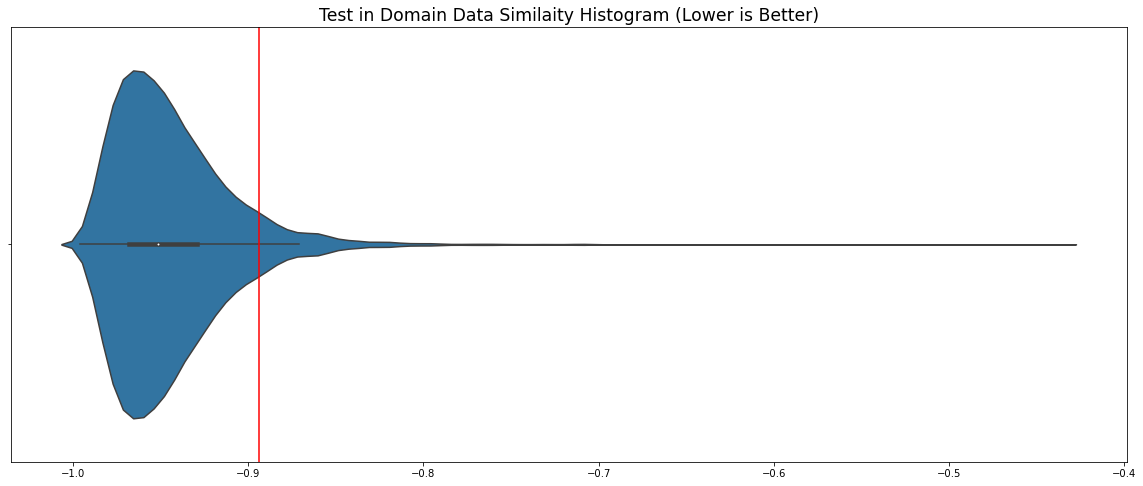

In [16]:
plt.figure(figsize = (20, 8))
plt.title('Test in Domain Data Similaity Histogram (Lower is Better)', fontsize = 'xx-large')
sns.violinplot(test_similarities)
plt.axvline(threshold, c = 'red')
plt.show()

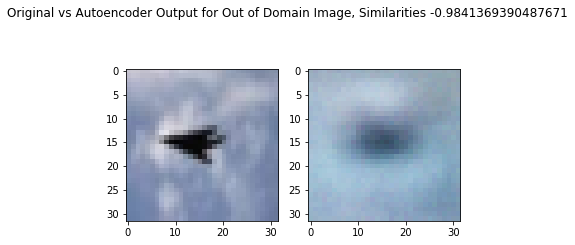

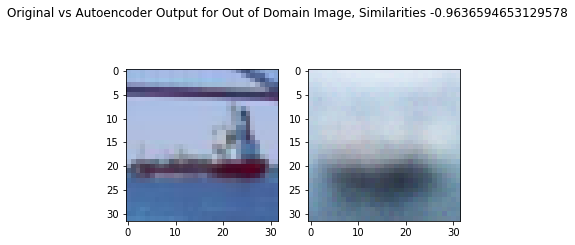

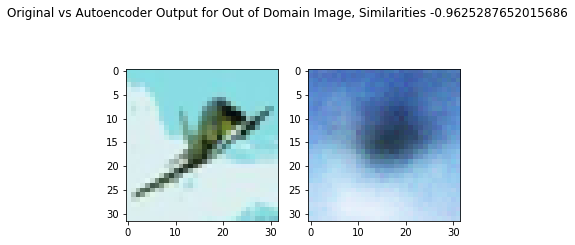

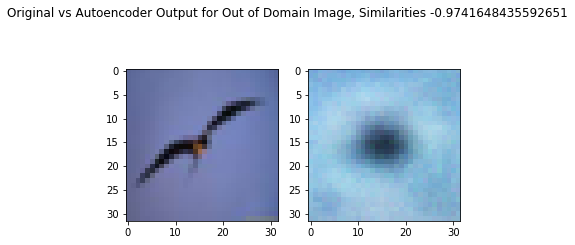

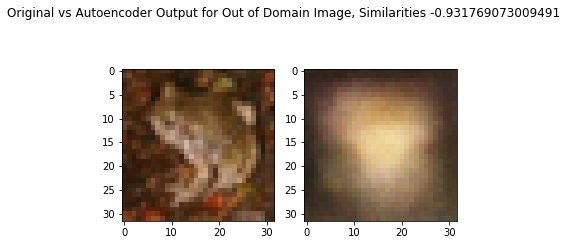

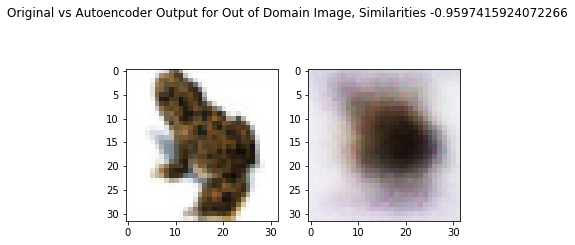

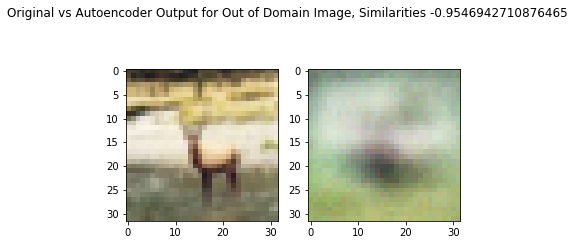

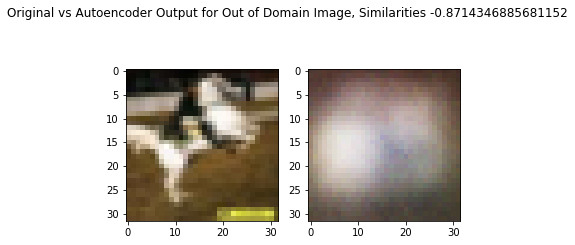

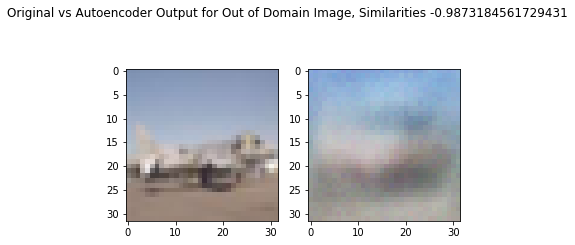

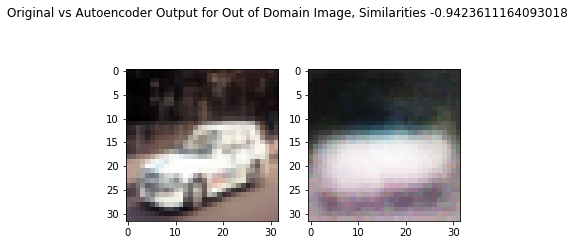

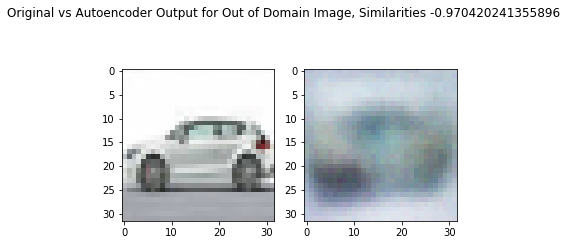

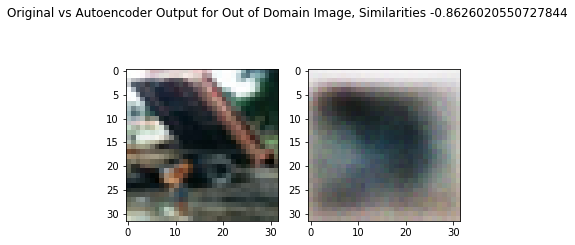

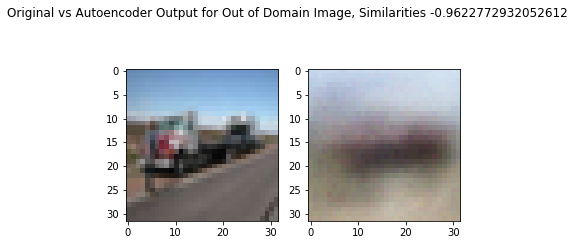

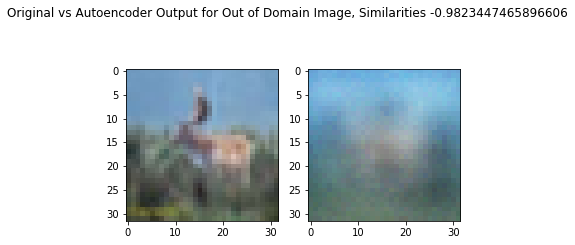

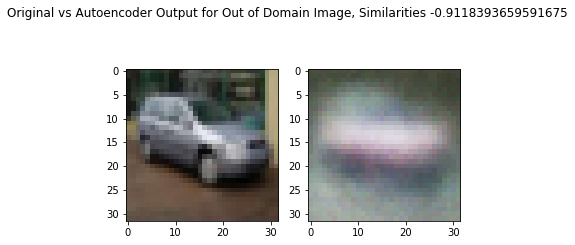

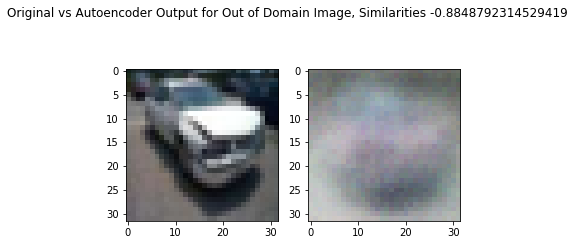

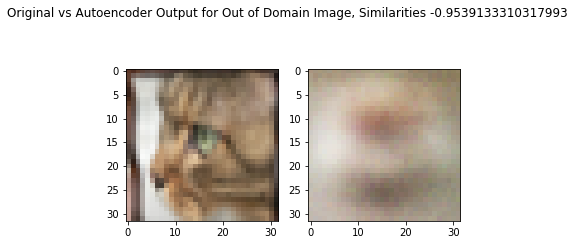

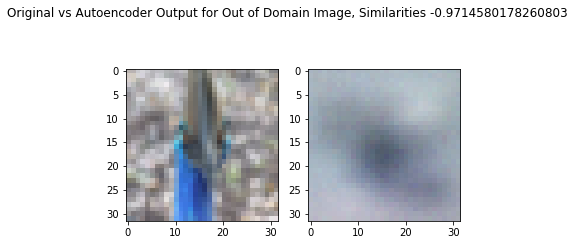

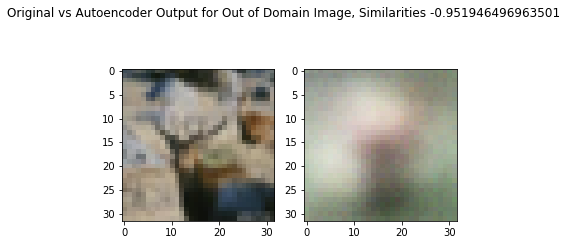

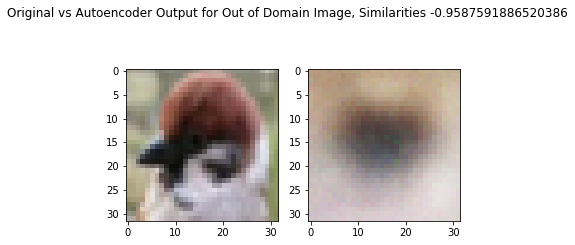

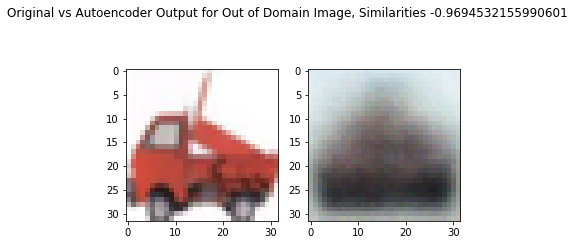

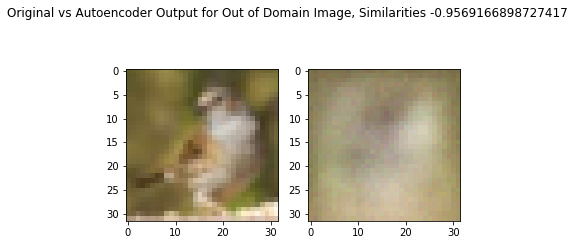

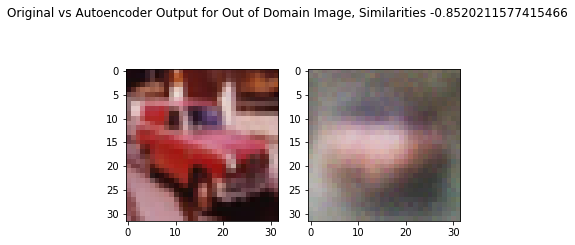

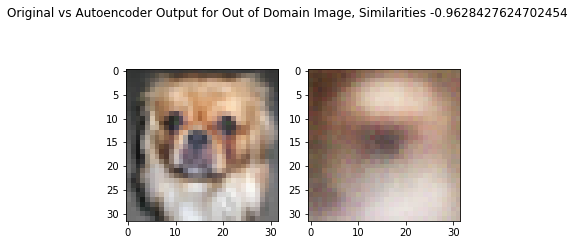

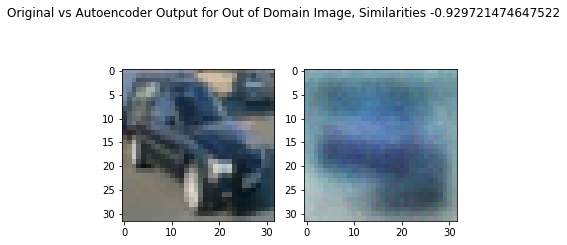

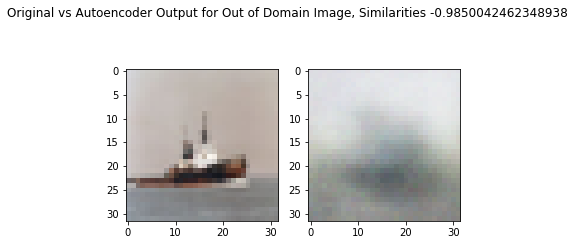

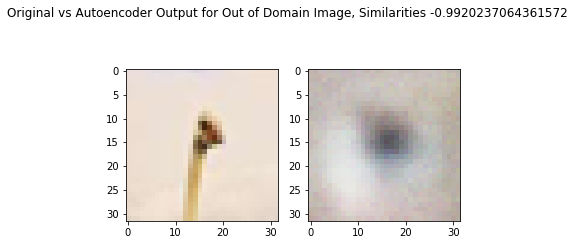

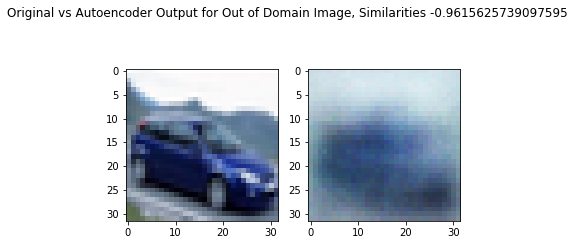

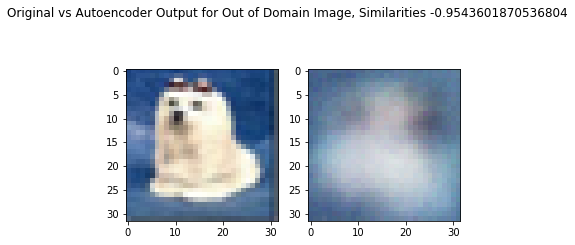

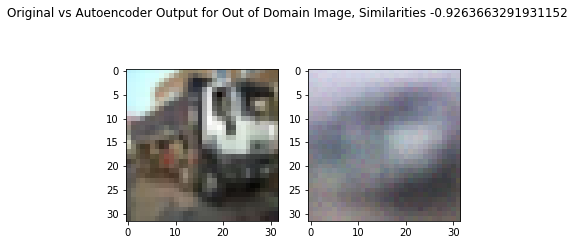

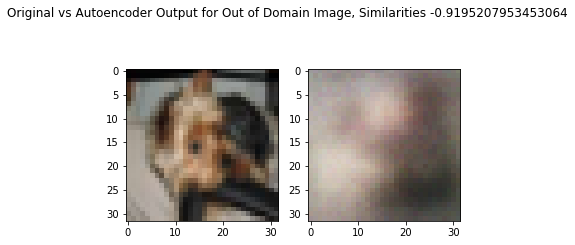

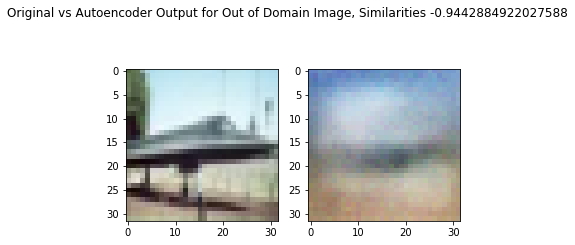

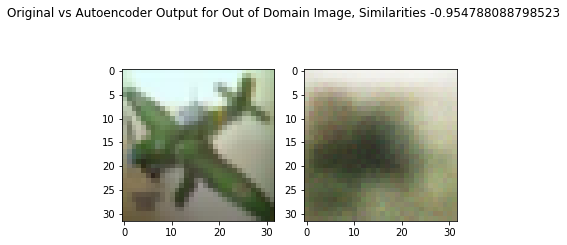

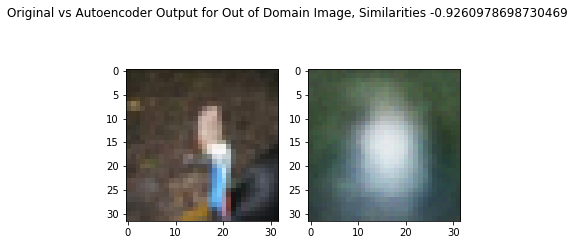

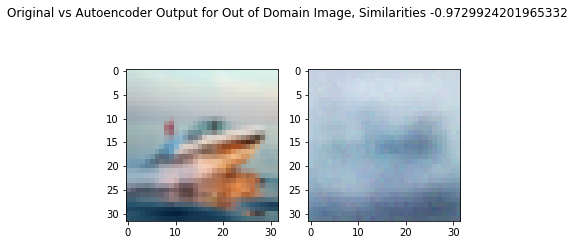

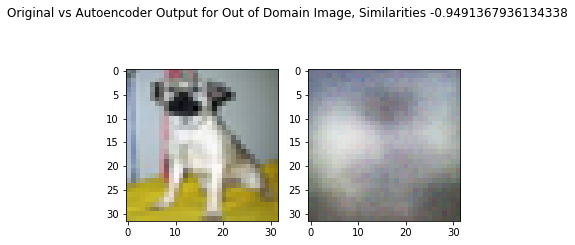

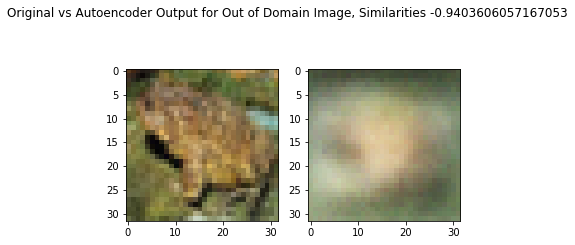

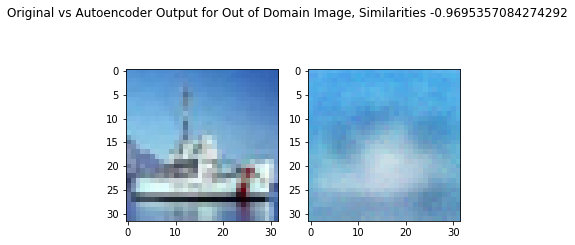

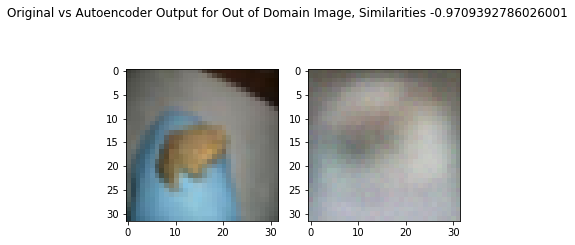

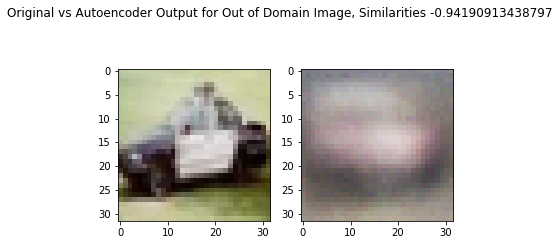

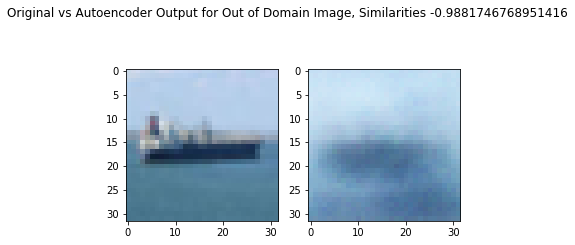

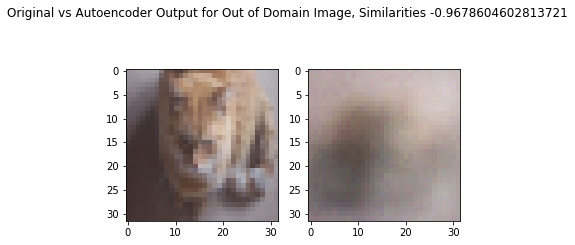

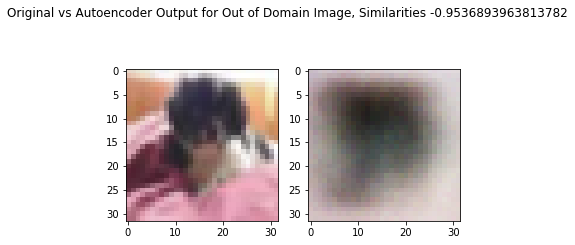

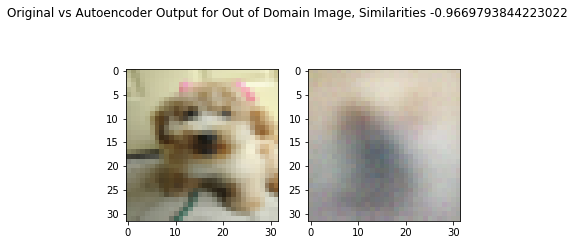

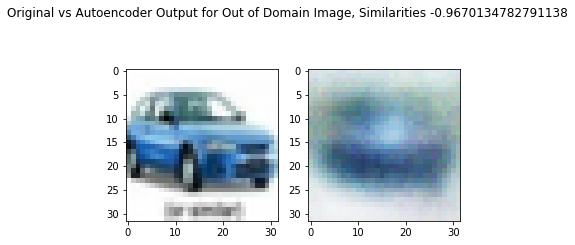

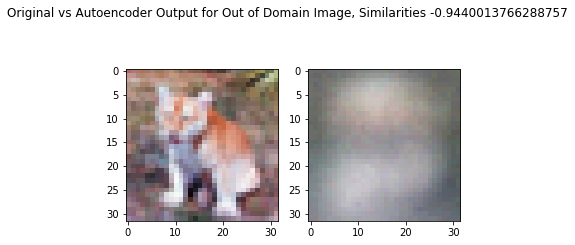

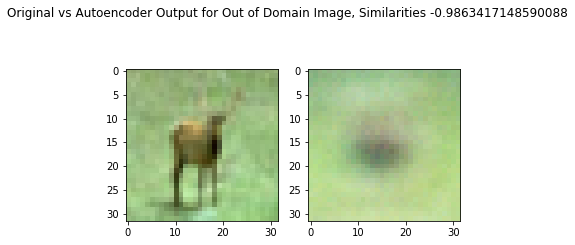

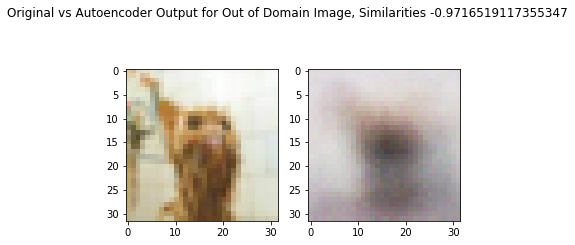

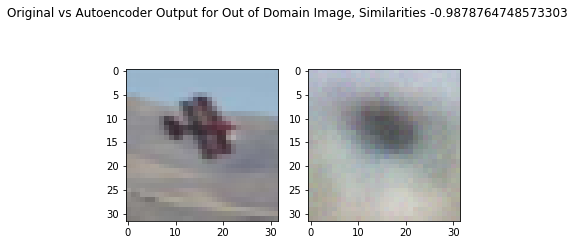

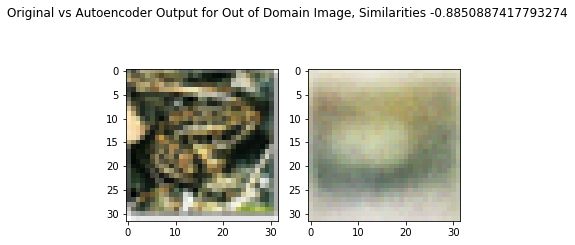

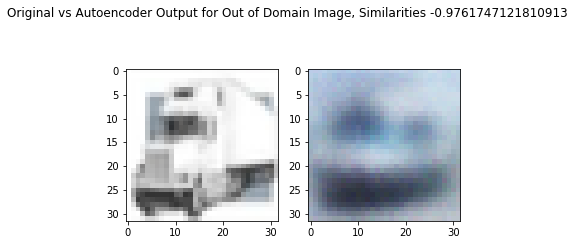

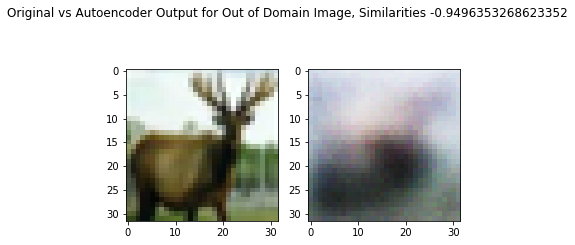

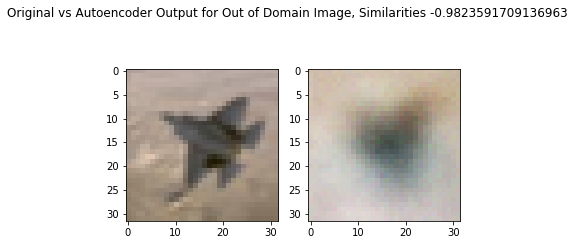

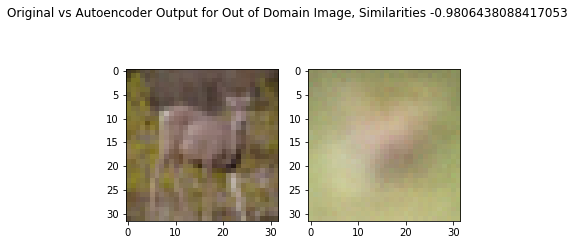

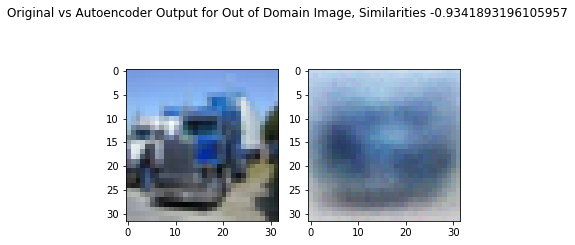

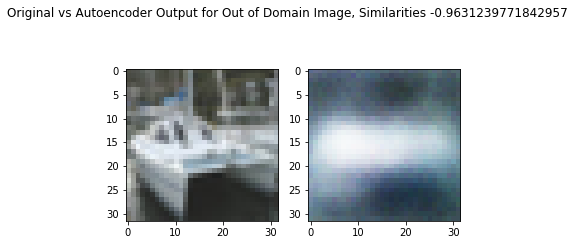

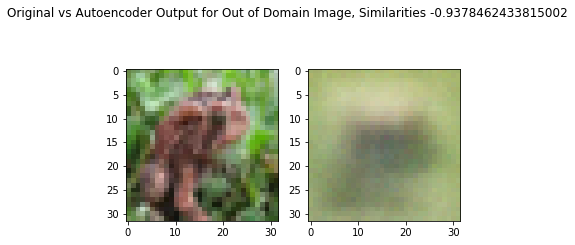

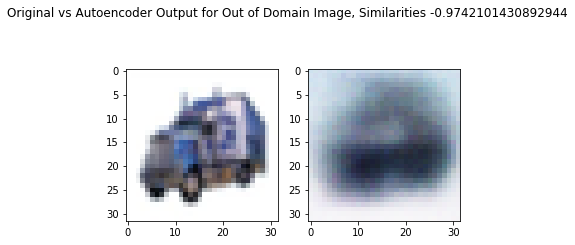

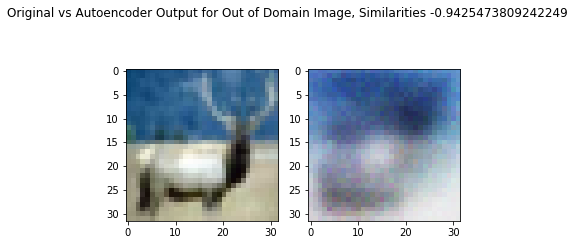

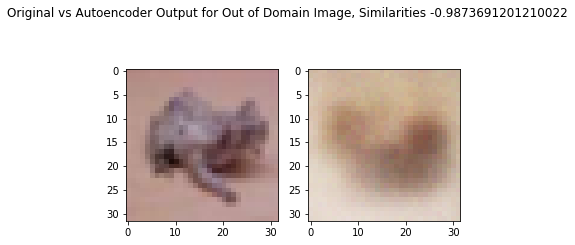

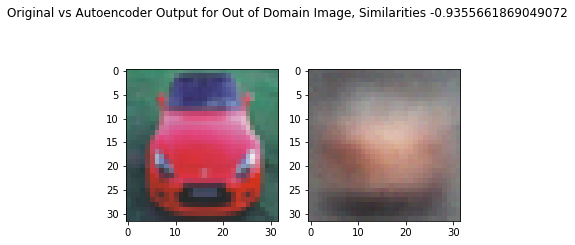

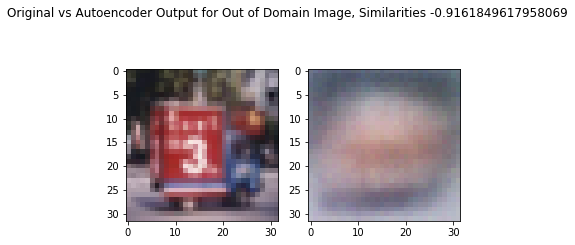

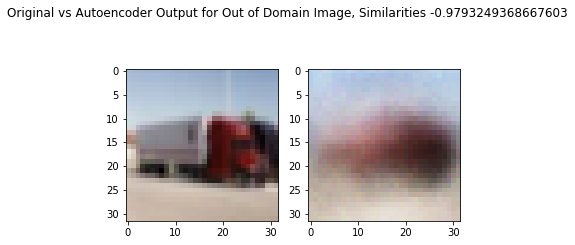

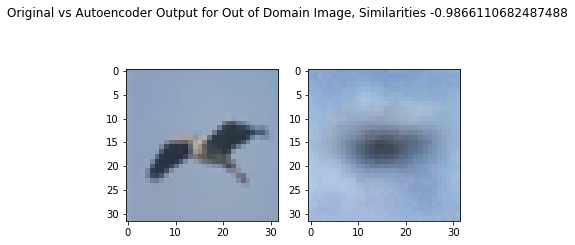

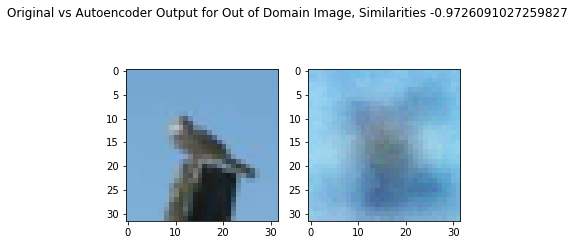

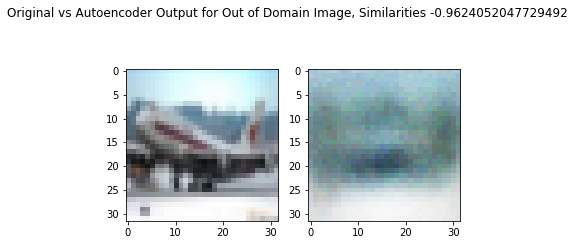

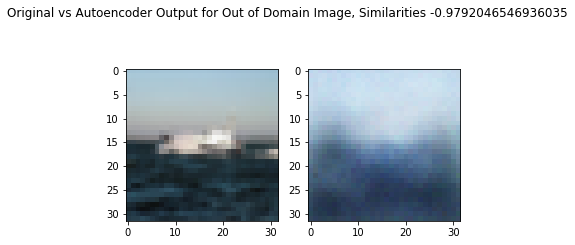

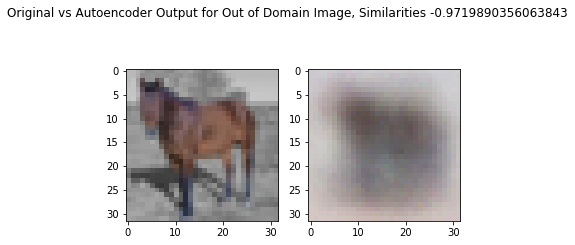

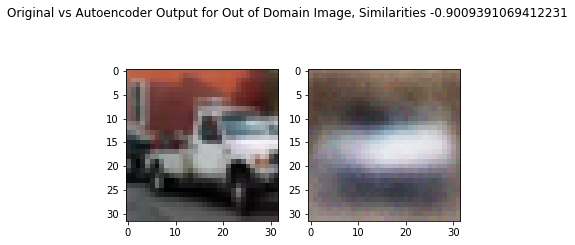

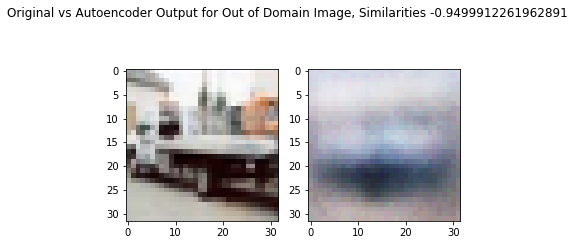

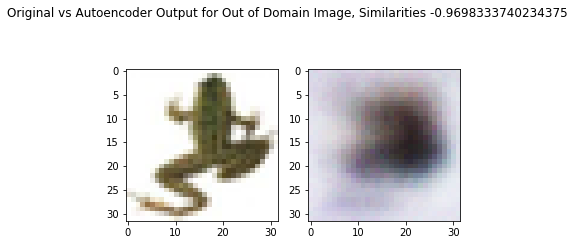

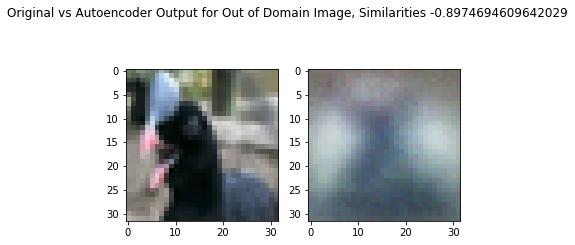

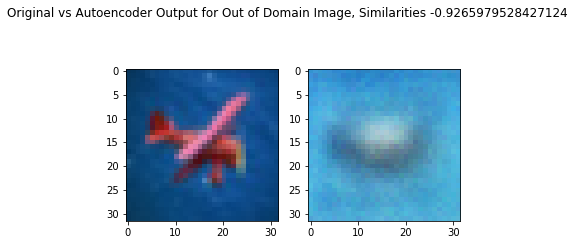

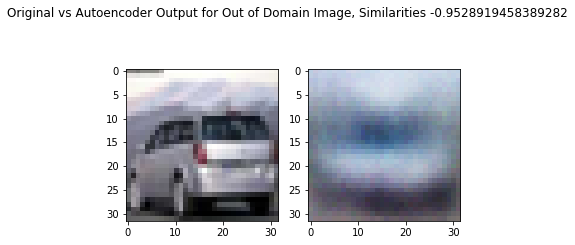

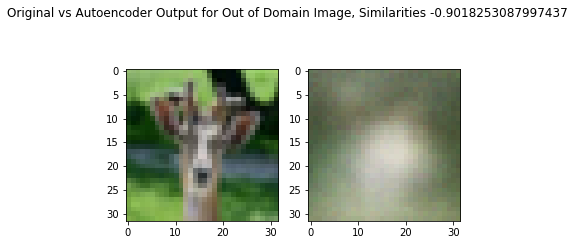

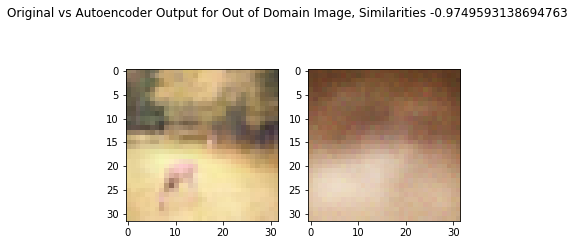

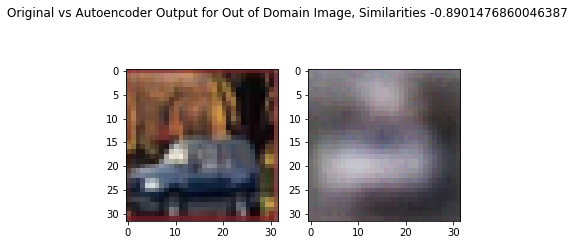

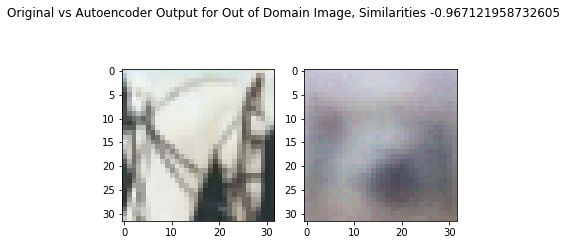

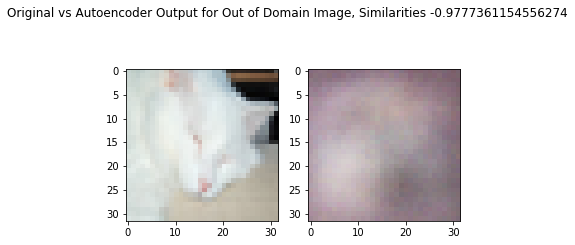

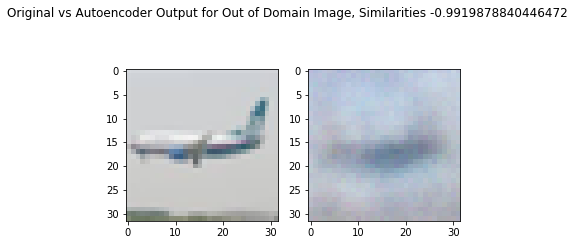

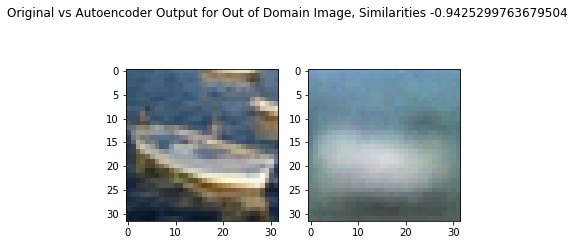

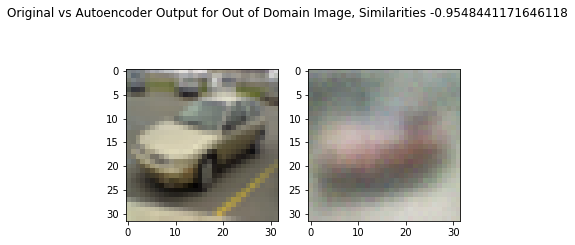

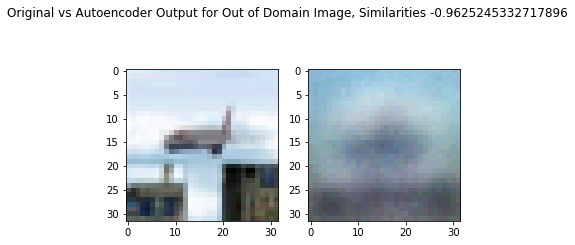

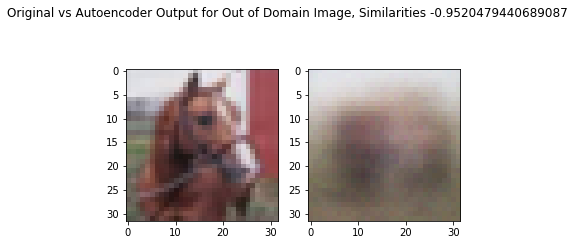

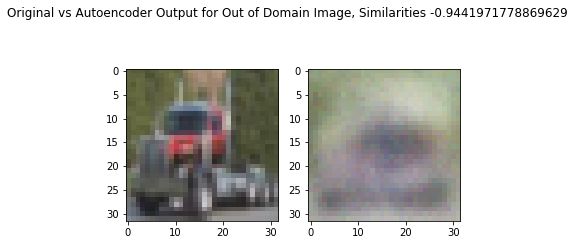

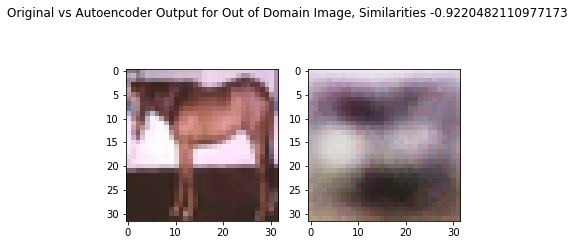

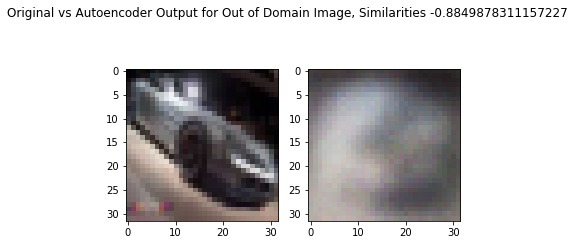

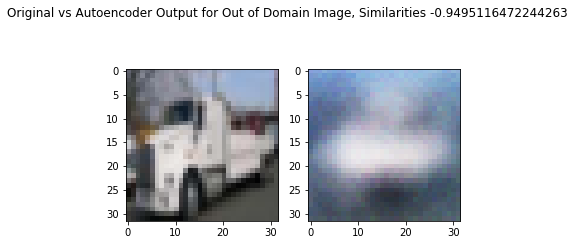

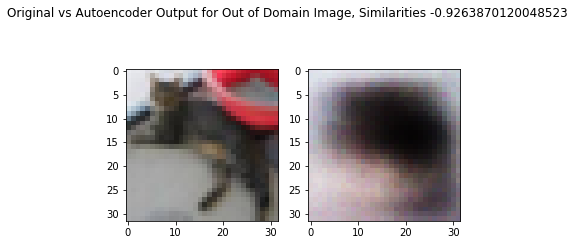

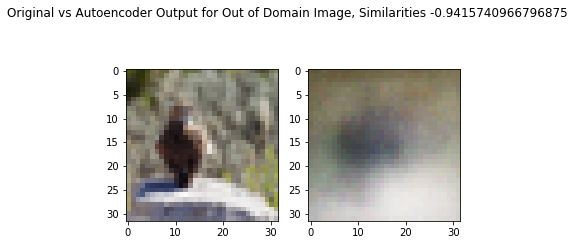

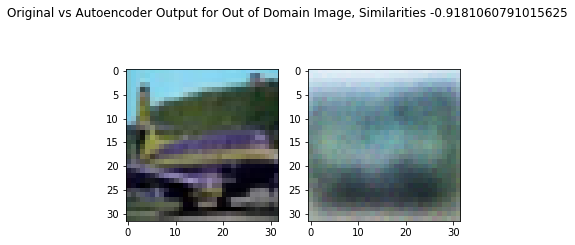

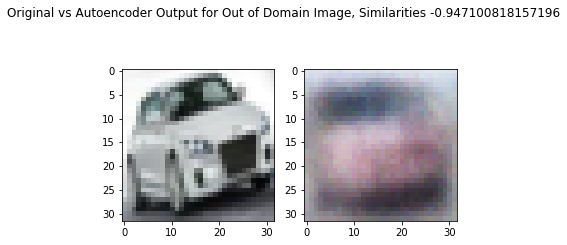

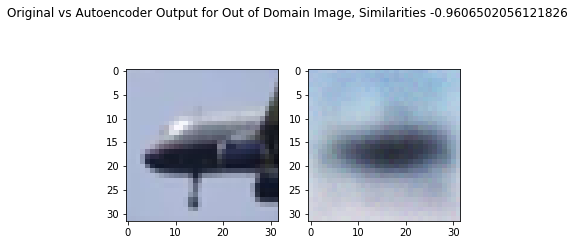

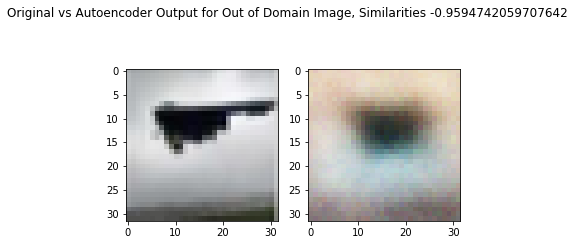

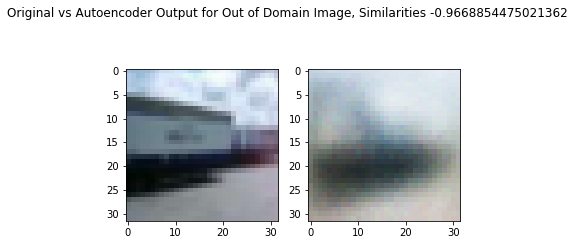

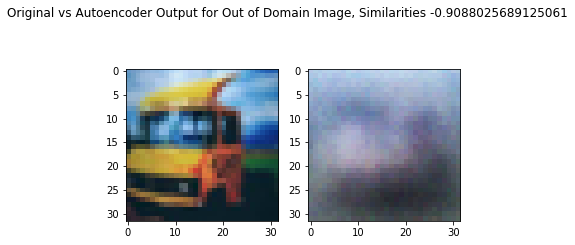

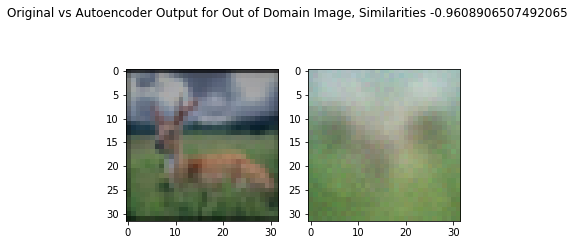

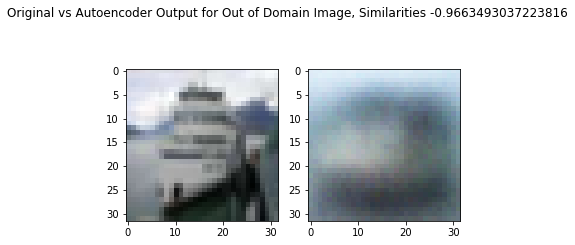

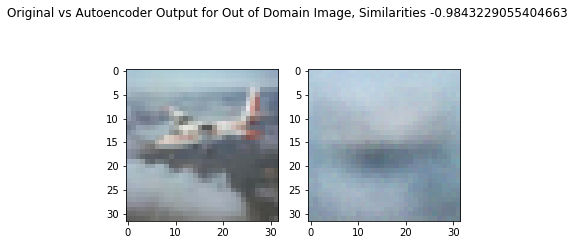

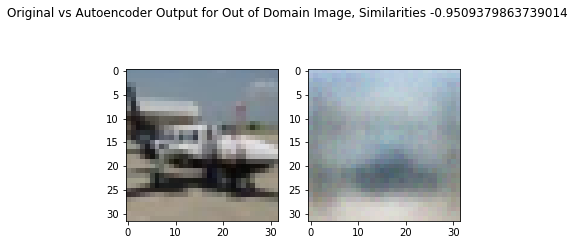

In [17]:
for random_index in np.random.choice(np.arange(test_autoencode.shape[0]), 100, replace = False):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.suptitle(f'Original vs Autoencoder Output for Out of Domain Image, Similarities {test_similarities[random_index]}')
    ax1.imshow(test_x_10[random_index])
    ax2.imshow(test_autoencode[random_index].reshape(test_x_10[random_index].shape))
    plt.show()

In [18]:
preds_100, autoencode_100 = model.predict(test_x_100)
preds_100 = preds_100.argmax(axis = 1)
preds_100 = [cifar_10_class_mapping[val] for val in preds_100.flatten()]
similarities_100 = tf.keras.losses.cosine_similarity(x_test_100_output.astype('float32'), autoencode_100.astype('float32')).numpy()
trust_100 = (similarities_100 <= threshold)

In [19]:
pd.Series(trust_100).value_counts()

True     8799
False    1201
dtype: int64

In [20]:
ood_trust = pd.DataFrame()
ood_trust['actual_class'] = [cifar_100_class_mapping[val] for val in test_y_100.flatten()]
ood_trust['predicted_class'] = preds_100
ood_trust['trust'] = trust_100
ood_trust.head()

actual_class predicted_class  trust
0     mountain        airplane   True
1       forest            deer   True
2         seal            deer   True
3     mushroom           truck   True
4          sea            ship   True

In [21]:
ood_trust.groupby(by = ['actual_class', 'trust']).size().unstack()

trust          False  True
actual_class              
apple           14.0  86.0
aquarium_fish   33.0  67.0
baby            13.0  87.0
bear             7.0  93.0
beaver           6.0  94.0
...              ...   ...
whale            3.0  97.0
willow_tree      3.0  97.0
wolf            10.0  90.0
woman           22.0  78.0
worm            22.0  78.0

[100 rows x 2 columns]

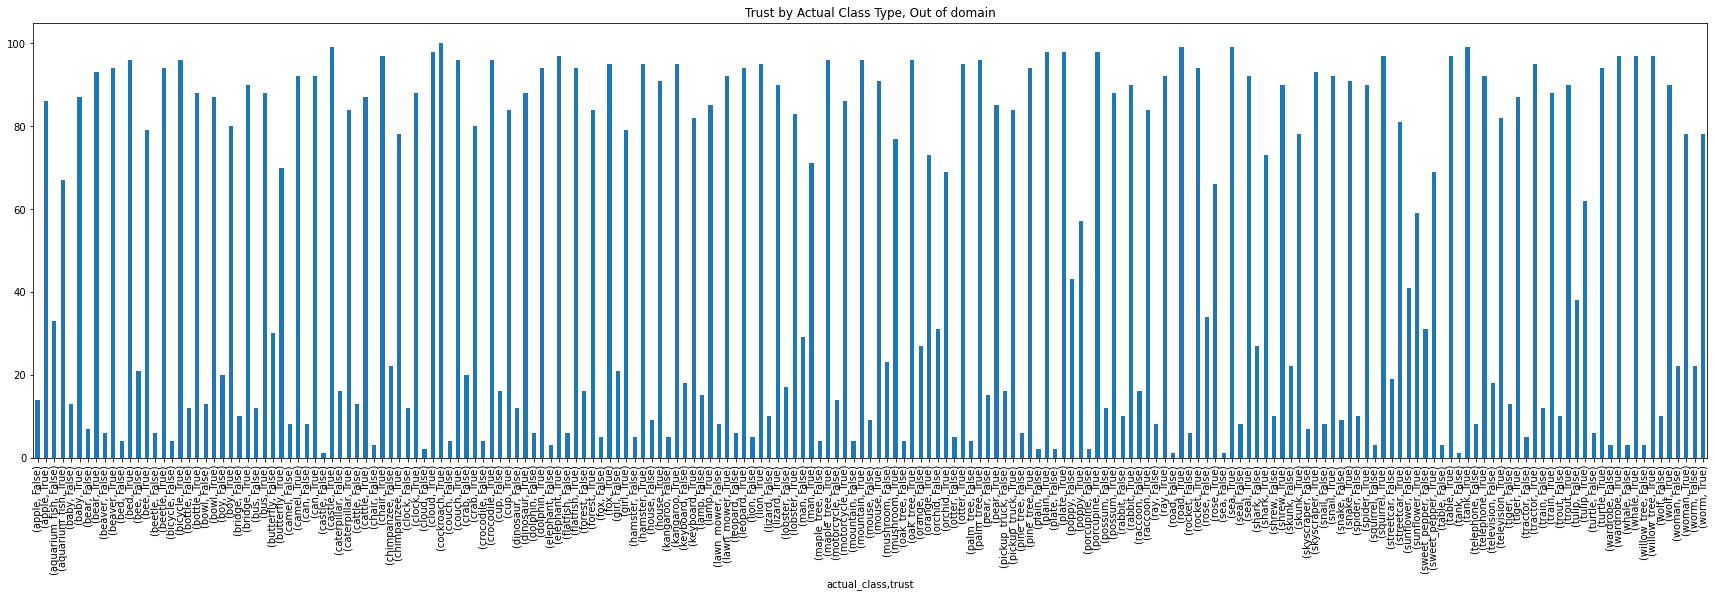

In [22]:
ood_trust.groupby(by = ['actual_class', 'trust']).size().plot(kind = 'bar', stacked = True, figsize = (30, 8), title = 'Trust by Actual Class Type, Out of domain')
plt.show()

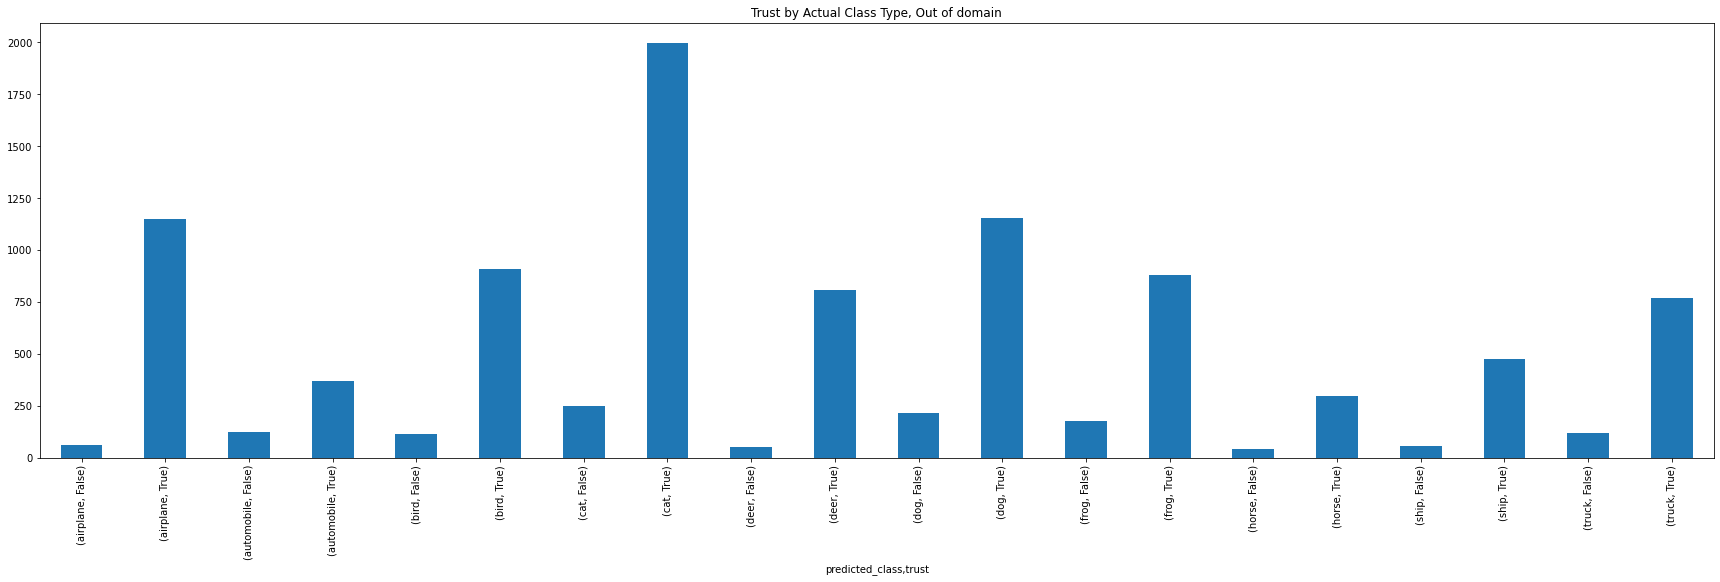

In [23]:
ood_trust.groupby(by = ['predicted_class', 'trust']).size().plot(kind = 'bar', stacked = True, figsize = (30, 8), title = 'Trust by Actual Class Type, Out of domain')
plt.show()

In [24]:
vals = ood_trust.groupby(by = ['predicted_class', 'actual_class', 'trust']).size().unstack().fillna(0).reset_index()
vals[vals.predicted_class == 'automobile']

trust predicted_class   actual_class  False  True
91         automobile          apple    6.0  25.0
92         automobile  aquarium_fish    2.0  10.0
93         automobile           bear    0.0   1.0
94         automobile         beaver    0.0   1.0
95         automobile            bed    1.0   5.0
..                ...            ...    ...   ...
161        automobile          whale    0.0   1.0
162        automobile    willow_tree    1.0   1.0
163        automobile           wolf    1.0   1.0
164        automobile          woman    1.0   1.0
165        automobile           worm    8.0   0.0

[75 rows x 4 columns]

In [25]:
ood_trust.groupby(by = ['actual_class', 'predicted_class', 'trust']).size().unstack().fillna(0)

trust                         False  True
actual_class predicted_class             
apple        automobile         6.0  25.0
             bird               2.0   3.0
             cat                2.0  27.0
             deer               0.0   2.0
             dog                0.0  16.0
...                             ...   ...
worm         deer               0.0   2.0
             dog                2.0   7.0
             frog               3.0   5.0
             ship               2.0   9.0
             truck              1.0   1.0

[895 rows x 2 columns]

/Users/jwrenn4/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


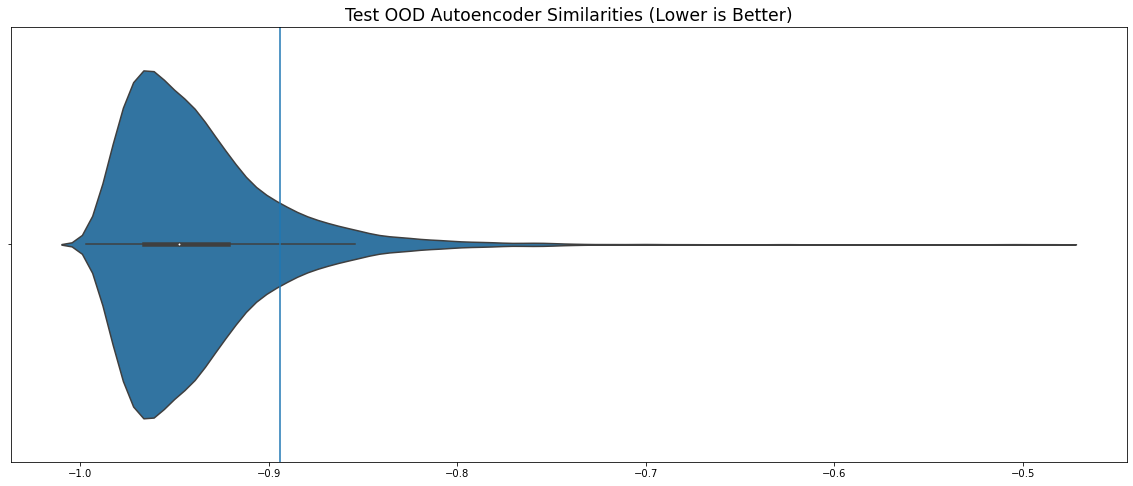

In [26]:
plt.figure(figsize = (20, 8))
plt.title('Test OOD Autoencoder Similarities (Lower is Better)', fontsize = 'xx-large')
sns.violinplot(similarities_100)
plt.axvline(threshold)
plt.show()

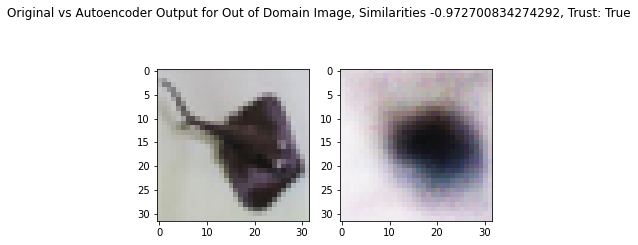

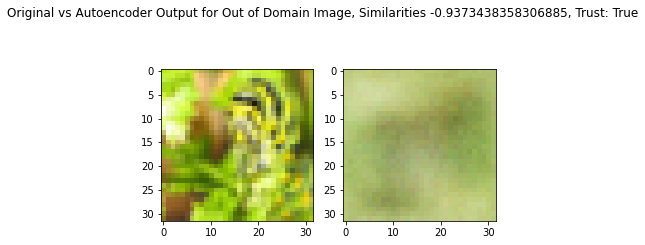

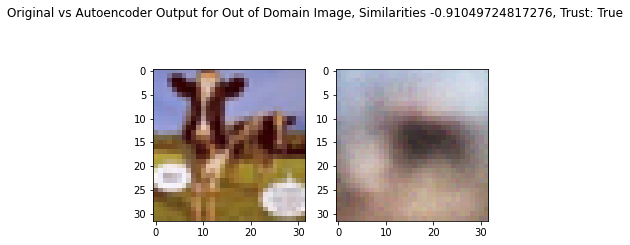

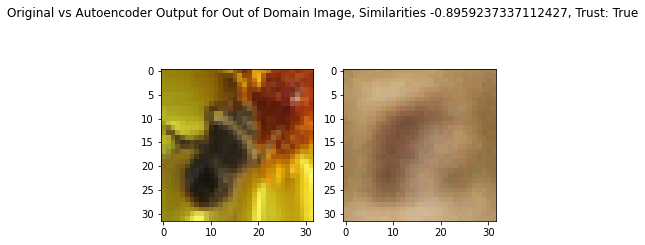

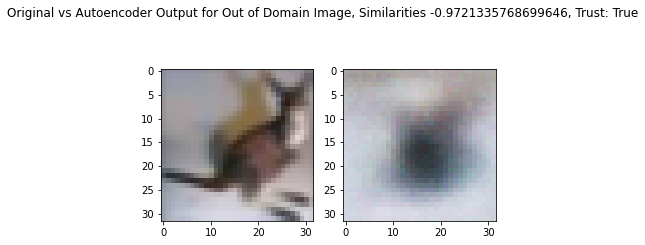

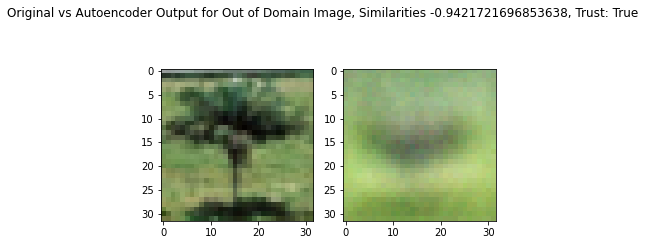

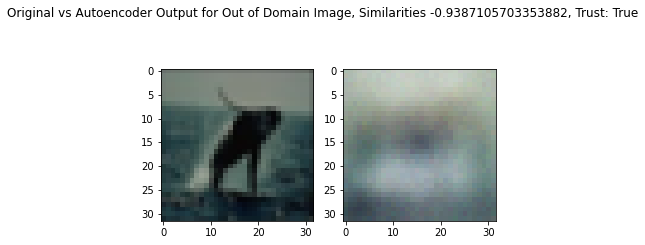

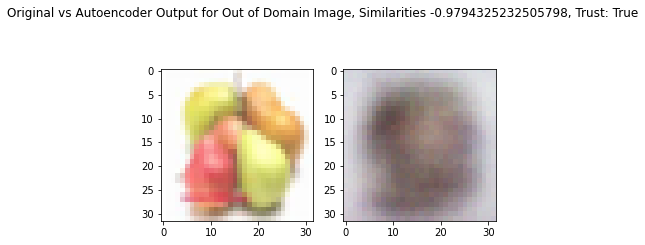

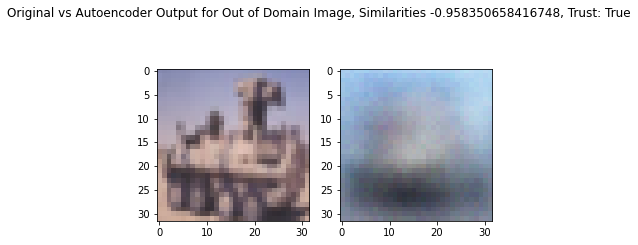

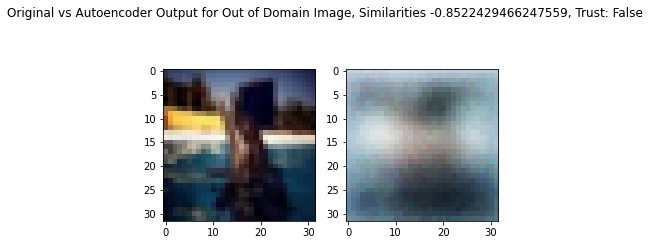

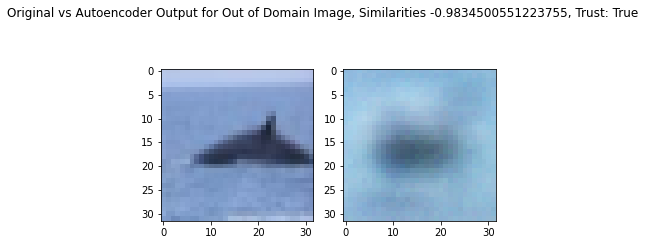

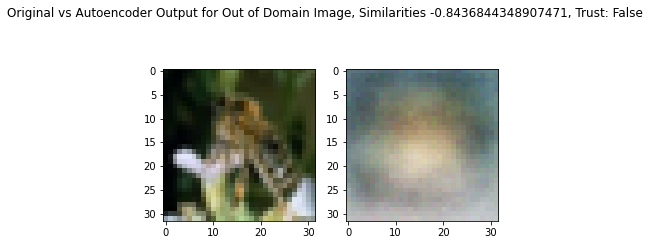

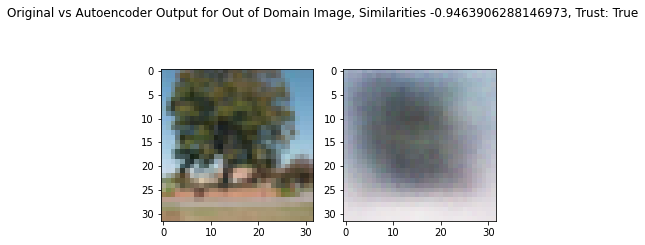

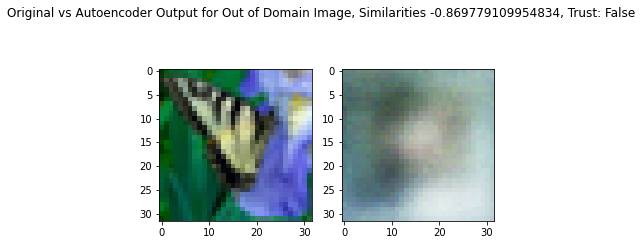

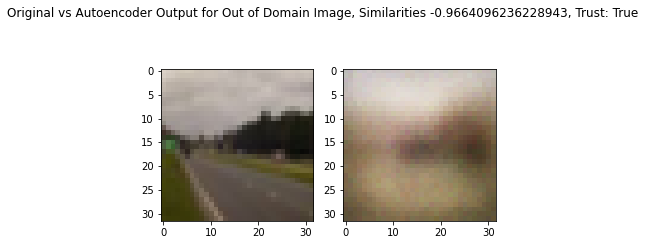

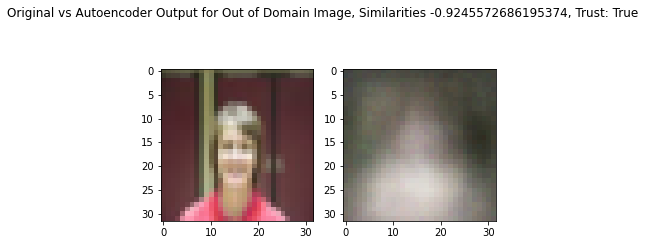

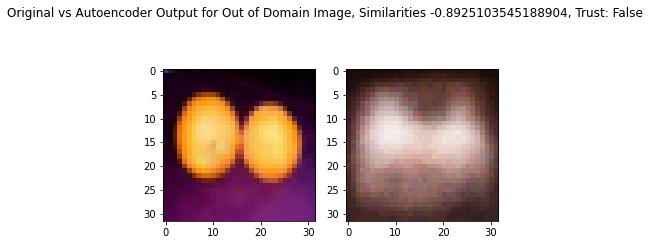

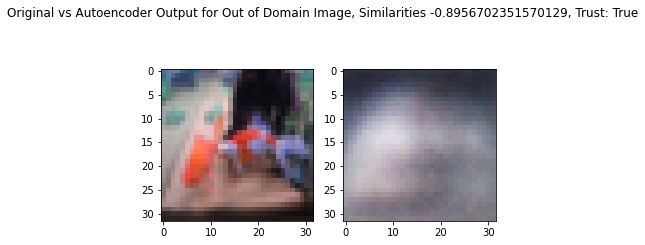

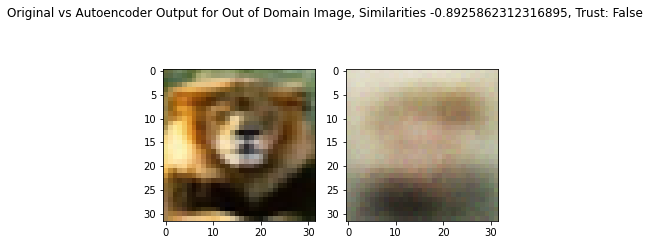

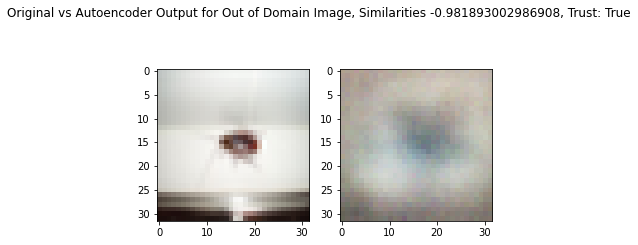

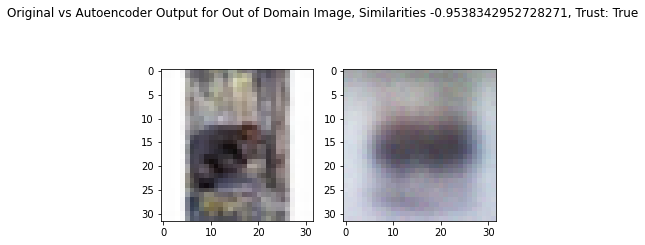

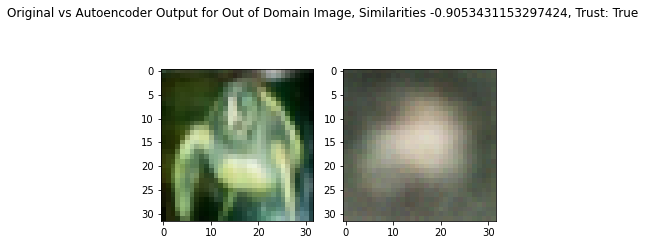

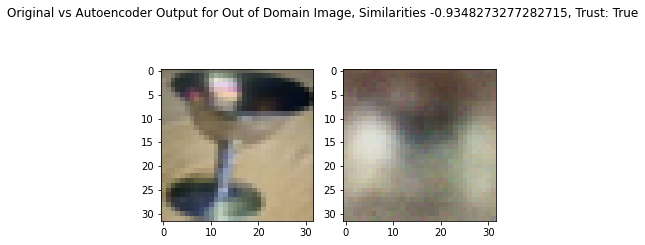

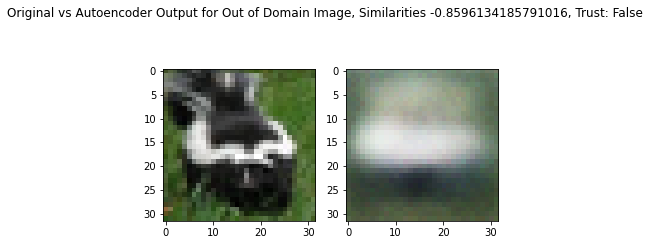

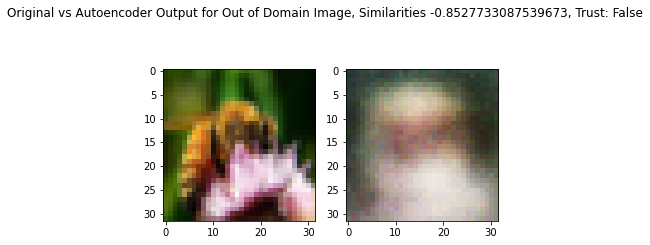

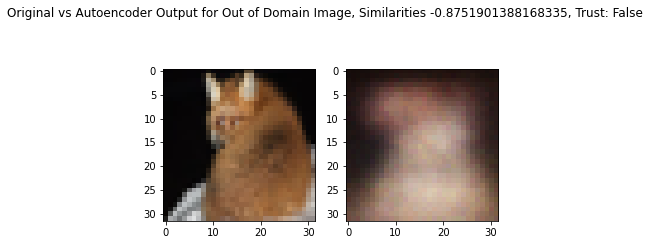

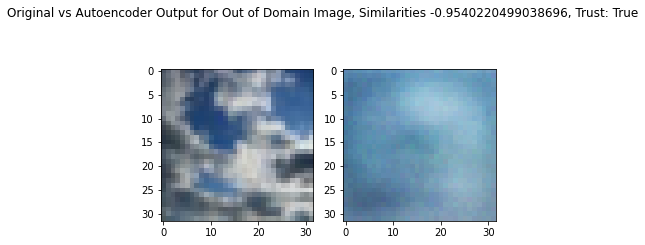

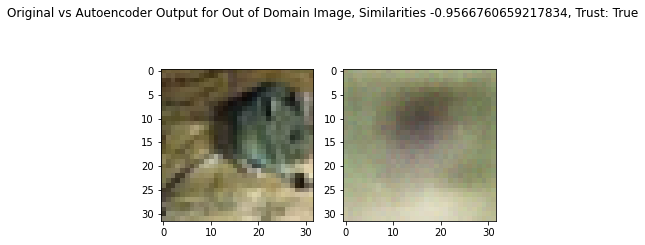

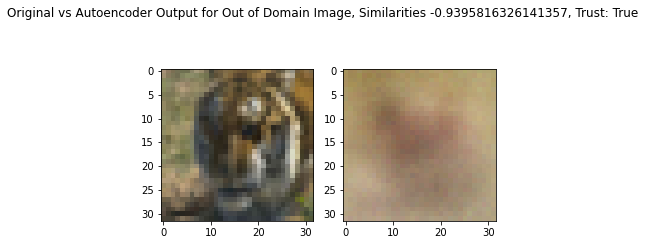

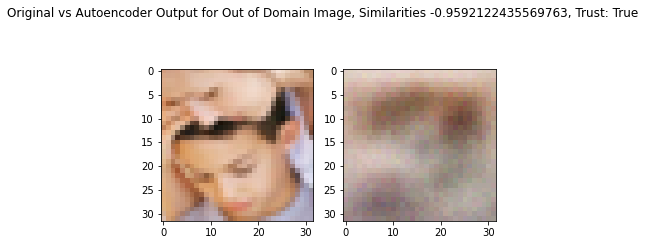

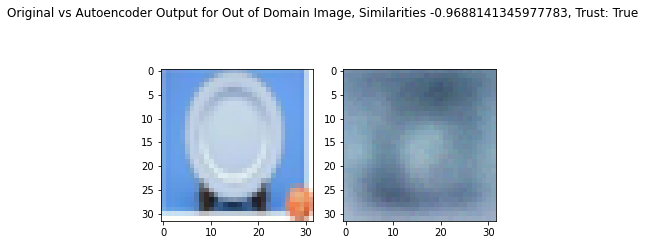

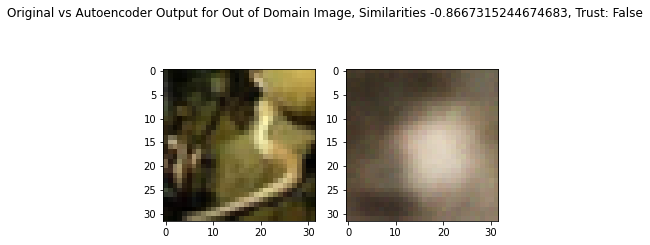

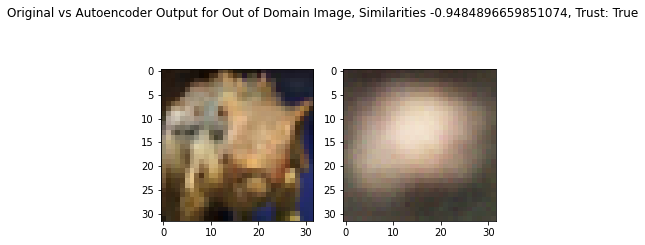

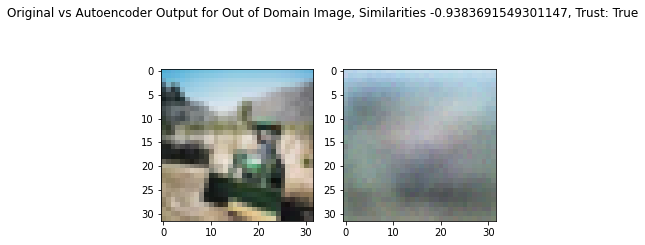

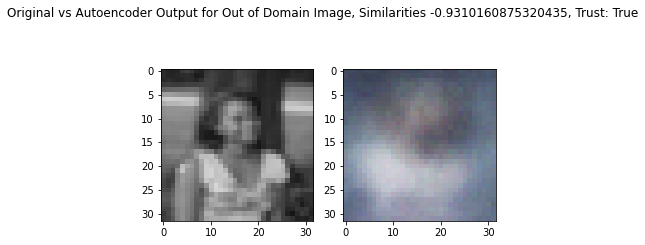

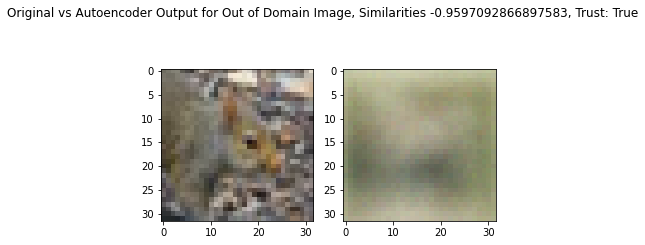

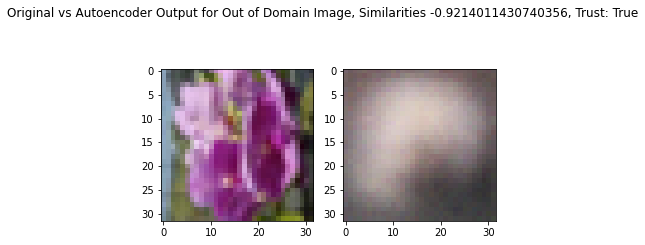

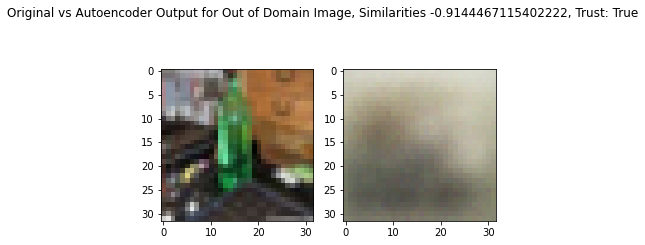

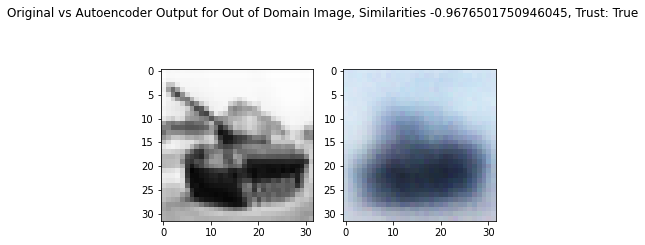

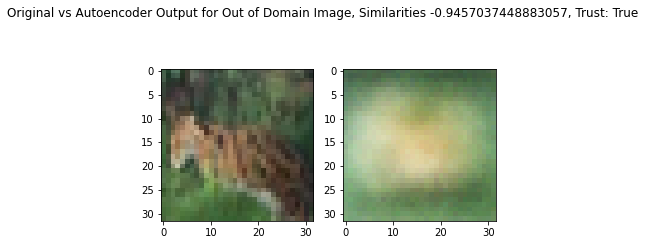

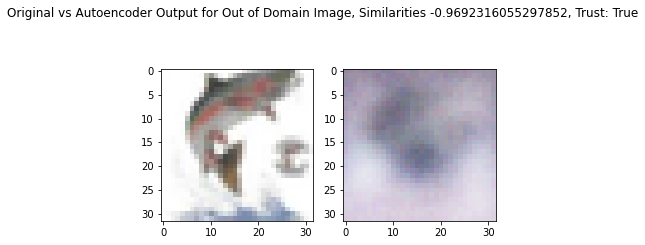

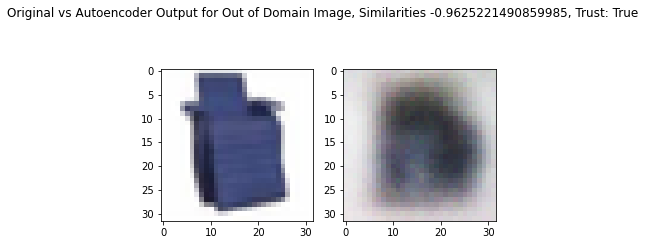

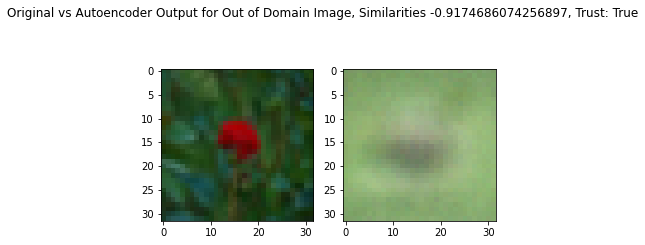

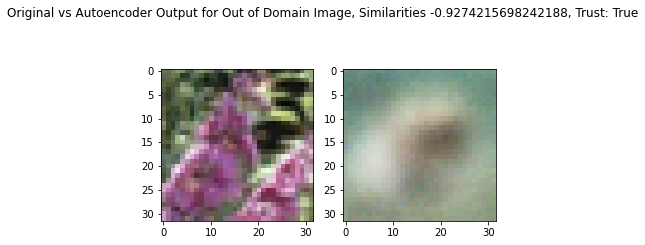

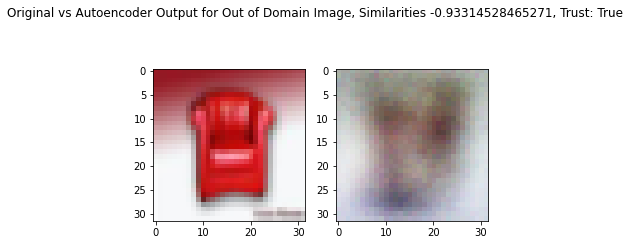

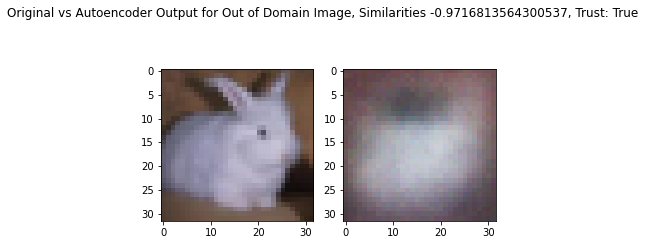

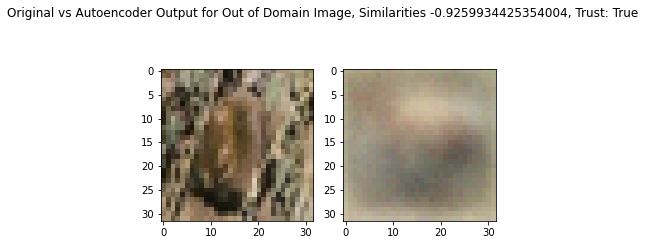

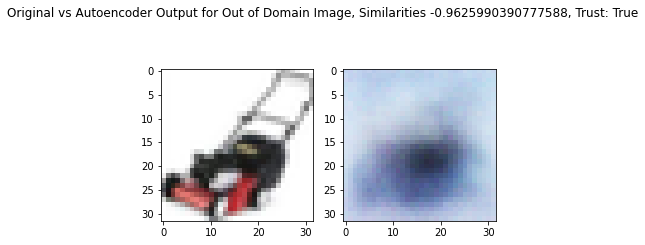

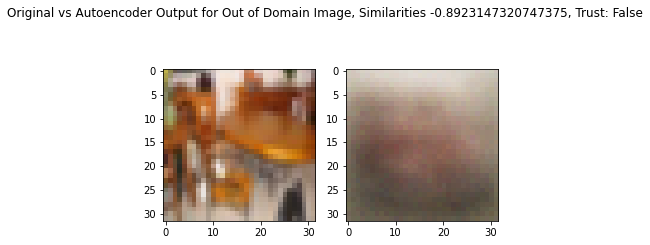

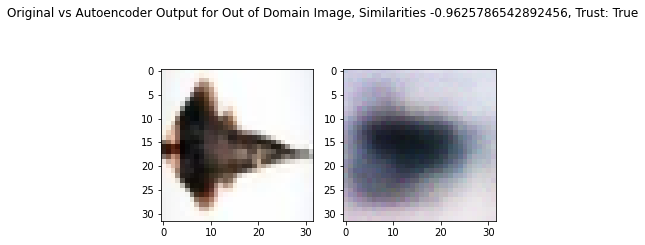

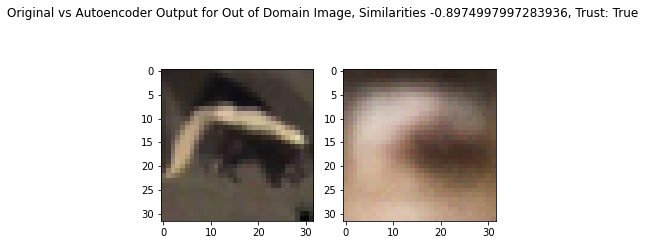

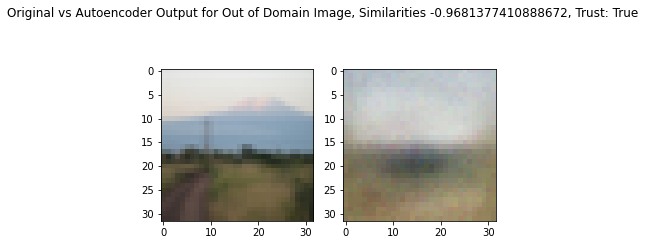

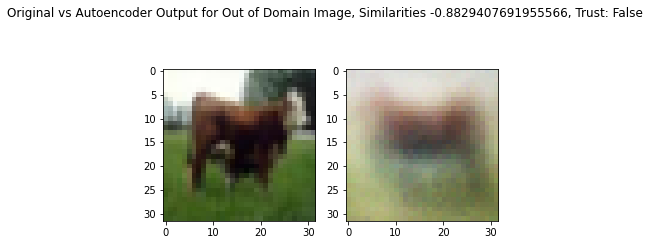

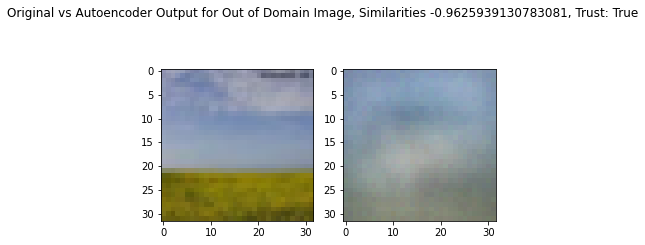

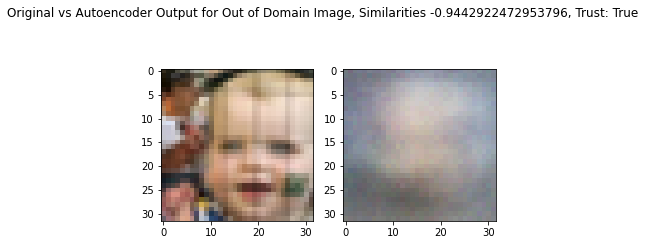

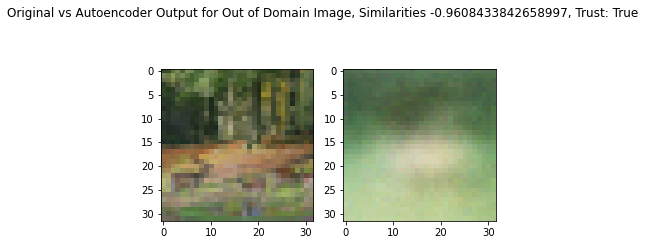

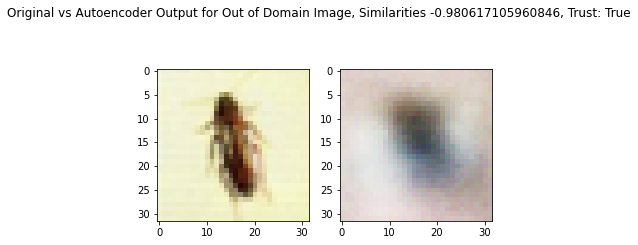

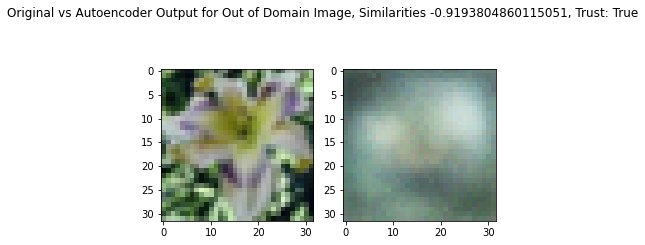

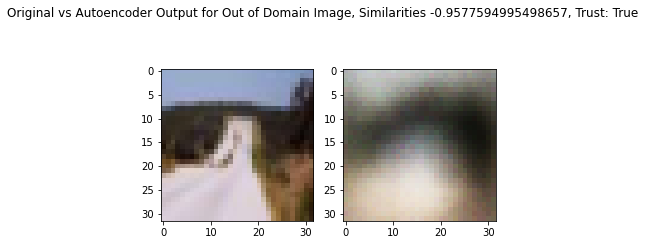

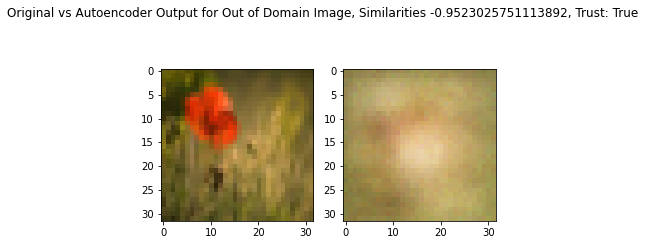

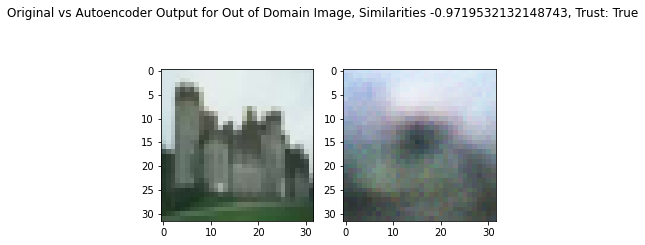

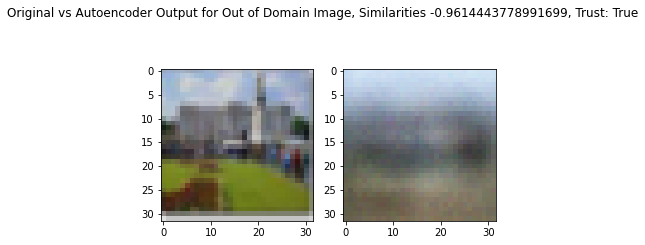

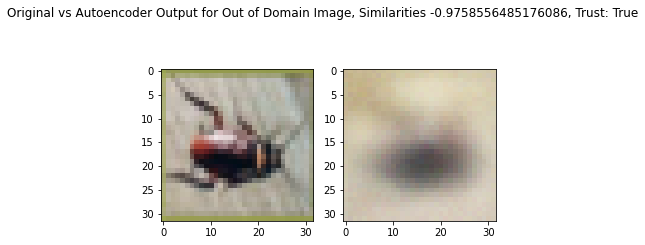

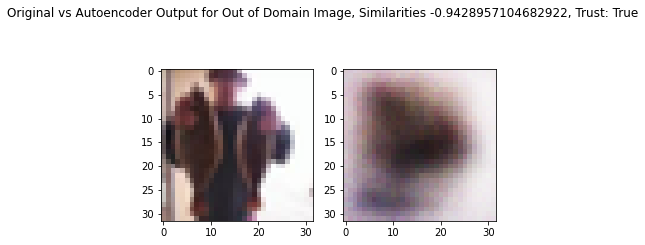

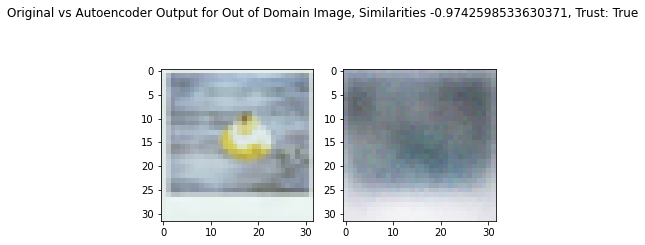

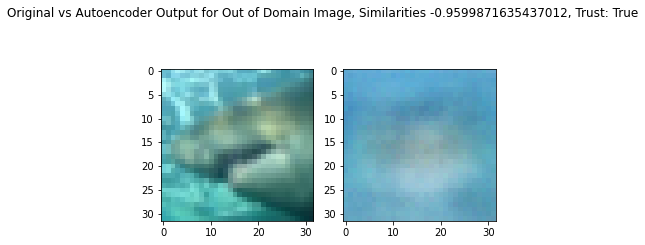

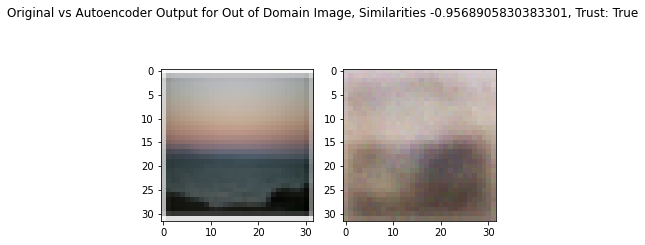

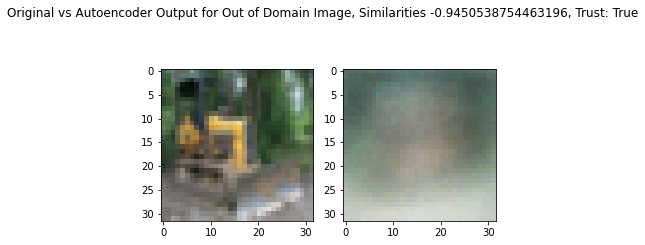

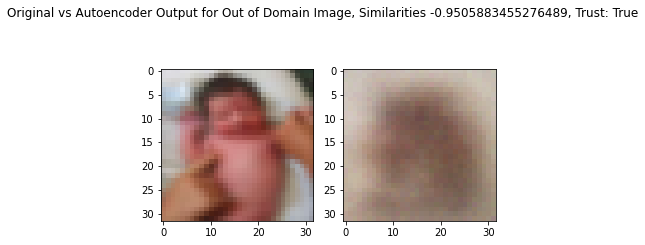

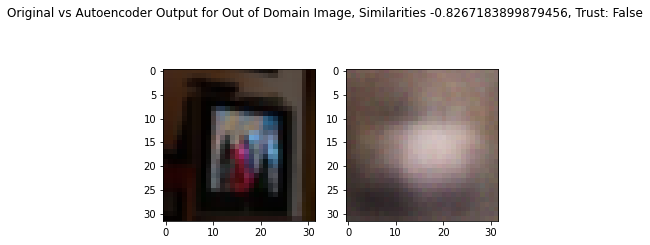

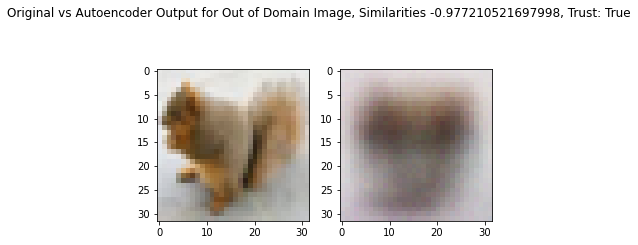

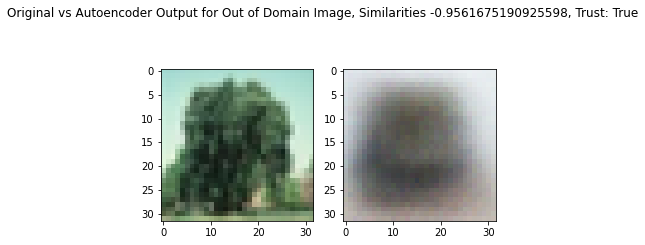

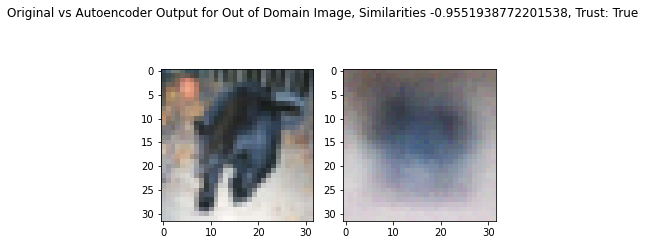

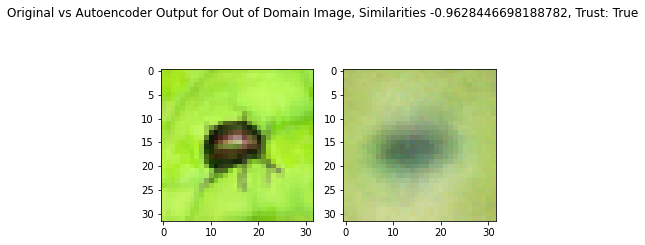

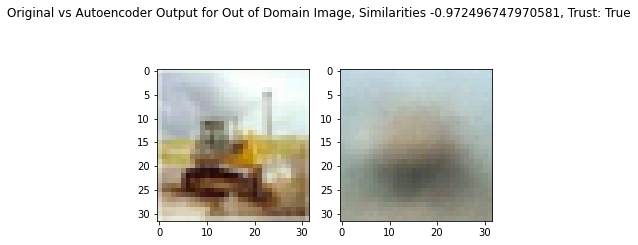

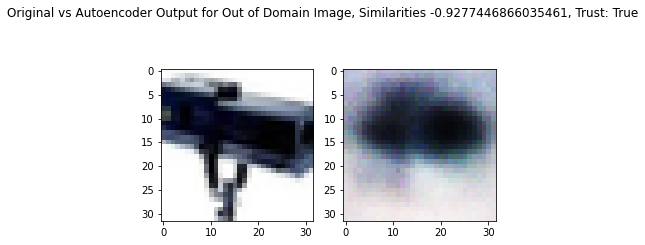

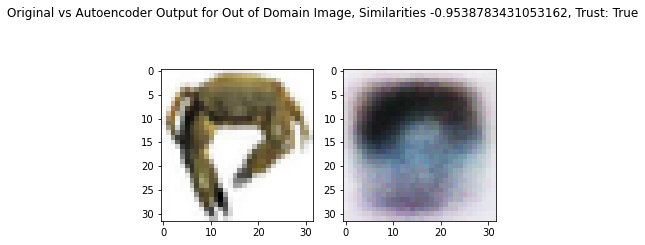

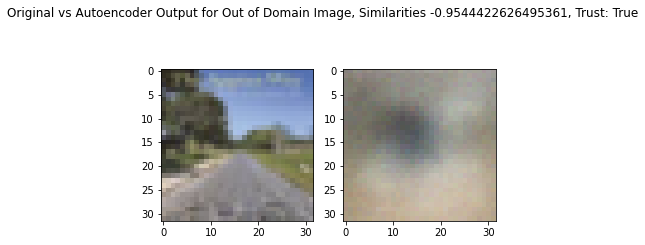

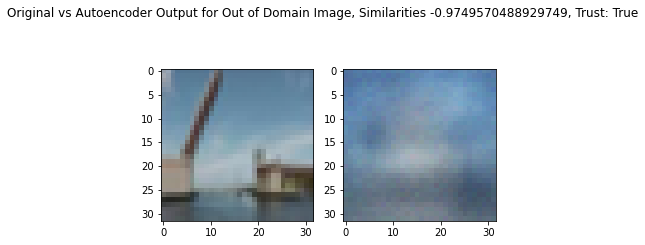

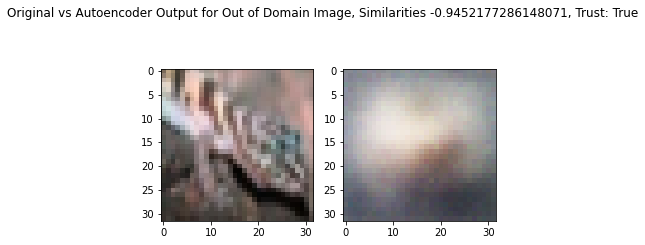

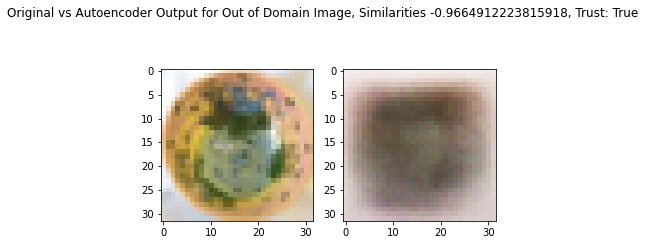

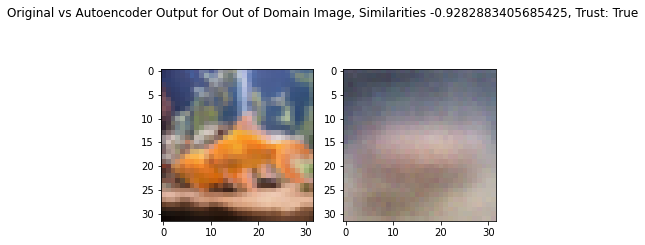

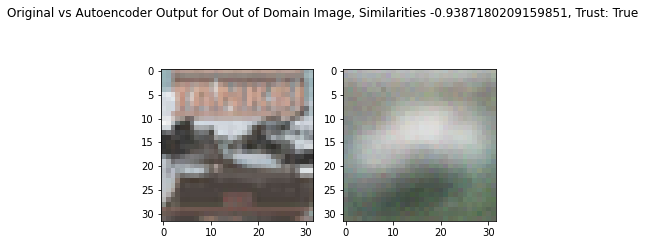

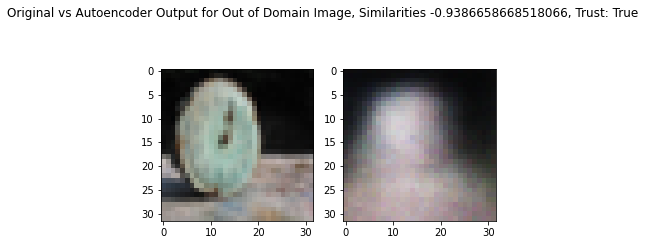

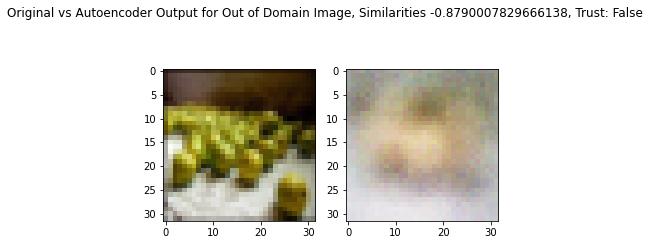

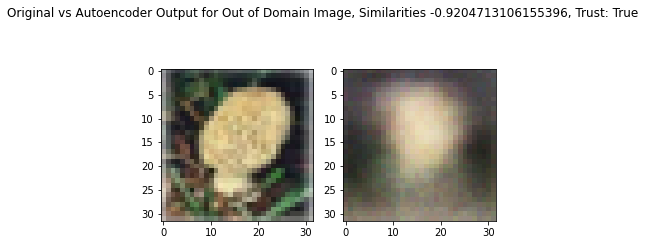

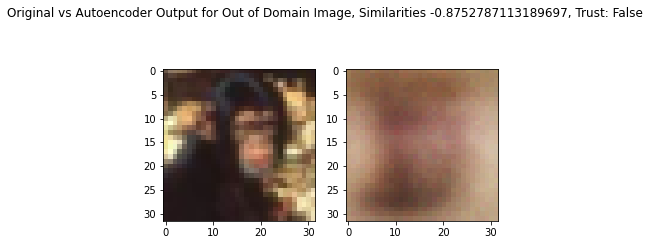

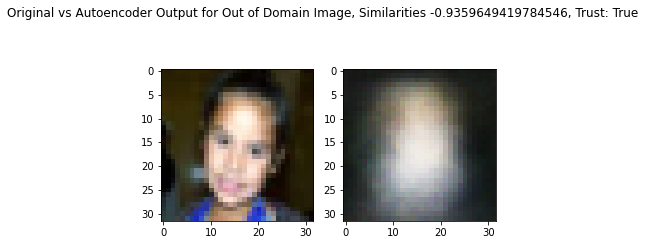

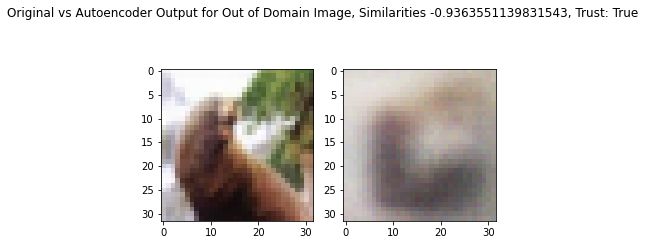

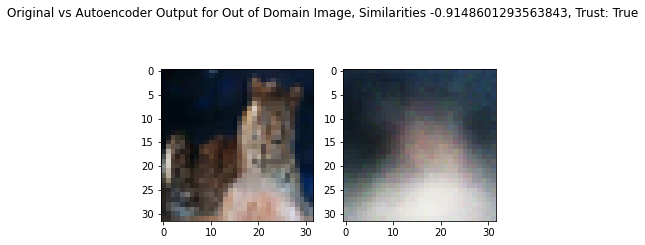

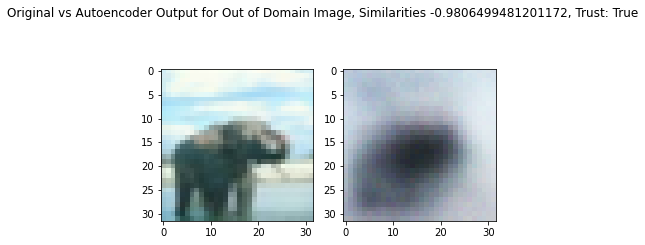

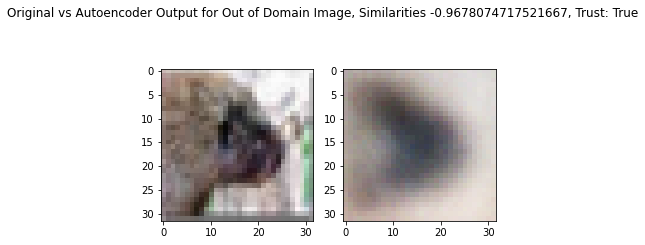

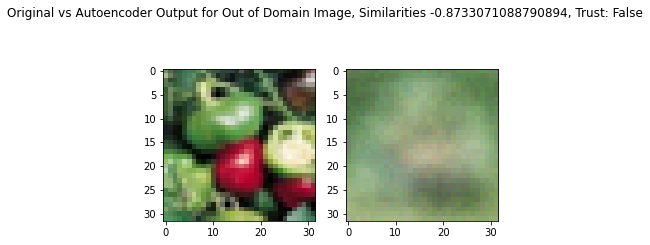

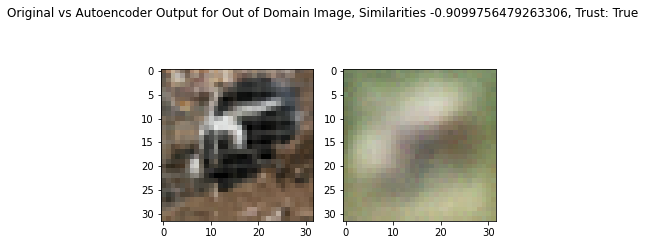

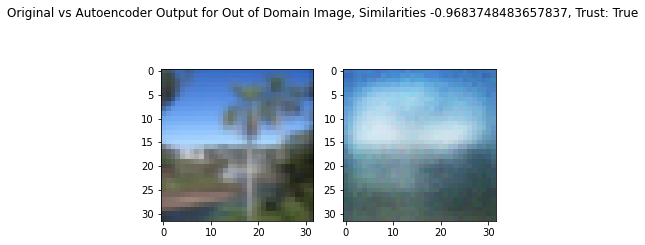

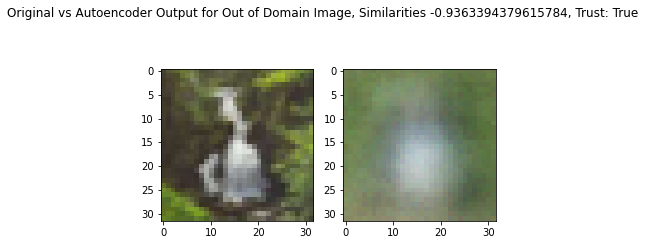

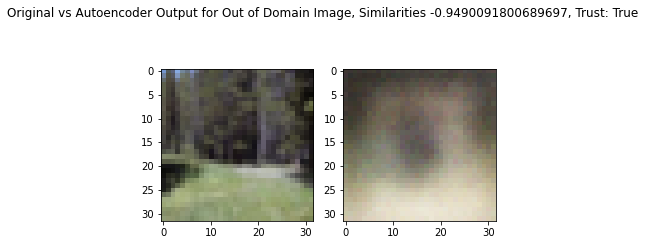

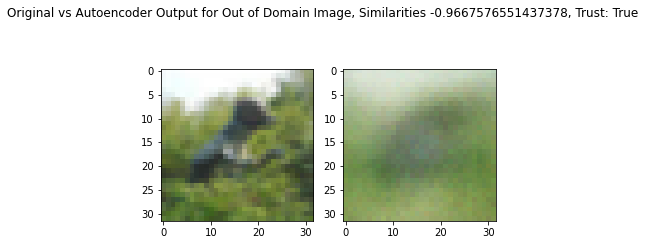

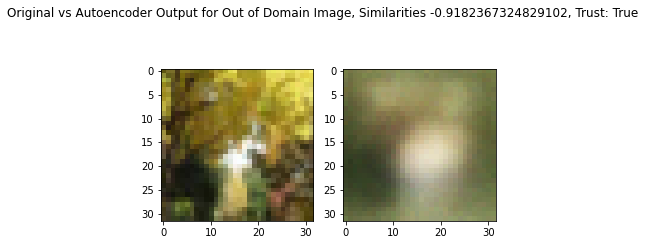

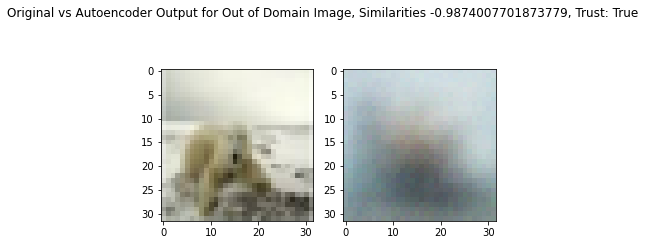

In [27]:
for random_index in np.random.choice(np.arange(autoencode_100.shape[0]), 100, replace = False):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.suptitle(f'Original vs Autoencoder Output for Out of Domain Image, Similarities {similarities_100[random_index]}, Trust: {ood_trust.trust.iloc[random_index]}')
    ax1.imshow(test_x_100[random_index])
    ax2.imshow(autoencode_100[random_index].reshape(test_x_100[random_index].shape))
    plt.show()